# Early Childhood Care Selection in the Greater Toronto Area

## Contents
* [Introduction](#introduction)
* [Business problem](#businessproblem)
* [Data](#data)
* [Methodology](#methodology)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction
This project was motivated by my personal struggles as a young working mother looking for child care options for her one year old in a pre-pandemic world.

The purpose of the project is to help myself and young families moving into York Region of Ontario, Ontario in exploring and much better informed options for early learning and chicld care. My project aims to create an analysys of comprehensive features around child care for families coming to the region from within or outside Canada, in order to help them make smart and efficient decision on what's best for them and their young family members.

## Business problem
As I mentioned above, the reasoning behind me choosing this subject to explore and analyze was my personal experience. My husband and I decided to move to Markham, Ontario from another city in the province while I was still pregnant so that we have time- pre baby- to find the necessary facilities, services, amneties and know our soroundings before the the baby comes. As we are working parents with no grandparents to pitch in, we knew that once my maternity leave ended we had to have a plan in terms of child care. We found it insanely difficult to find and choose, more so that thh waiting lists are very long.

While York Region, of which the city of Markham is part, has a very comprehensive website and resource list, everything is very static and time consuming and quite some extensive analysis had to be done to find a list of child care options for our child in a prepandemic world. It was very hard to find information on daycare and other child care options in the city in such a way that it makes the decision process easy, efficent and result driven.

The main aim of my project analysis is to help the decision makin process less stressful and easier by providing a comprehensive, easy to follow list of child care options in Markham, Ontario, that can be used by new families either already living in the city or just moving in the city. The end result will need to have details on learning and care options, ratings, locations, reviews, programs included and fees, other amneties and dependencies.

# Data

## Data sources

Based on the business problem this project will use data from various sources in order to achieve it's desired result. The main data sources will be:

* Wikipedia list of Postal Codes in Canada, in order to identify cites and neighbourhoods in the Grand Toronto Area https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
* Geographical coordinates from http://cocl.us/Geospatial_data in order to find specific location of each city and neighbourhood
* Foursquare API for data on child care locations and user reviews
* City data on child care options : https://insights-york.opendata.arcgis.com/datasets/childrens-service/data 
* Provincial data on child care options in the province of Ontario : https://data.ontario.ca/dataset/licensed-child-care-facilities-in-ontario

Secondary data sets will be used for analysis purposes or partial scrapping where other data is not available. For example: 
* National data on child care options: https://www150.statcan.gc.ca/n1/pub/11f0019m/11f0019m2006284-eng.pdf
* York region child care programs and market rates : https://ww6.yorkmaps.ca/Html5Viewer24/Index.html?viewer=ChildrensServices.YorkMaps

# Methodology
## Exploratory data analysis

In [2]:
# First we import all necessary dependencies for the project
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

!pip install folium
import folium # map rendering library
import random
!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

from bs4 import BeautifulSoup
import csv

print('Libraries imported.')

     |████████████████████████████████| 102kB 13.2MB/s ta 0:00:01
Libraries imported.


In [2]:
# Get Postal codes for region of York
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_L'
response = requests.get(url)

#Process and convert html data
data = response.text
soup = BeautifulSoup(data,'html.parser')
table_wikipedia=soup.find('table')

#Create the pandas dataframe
gtaraw_df = pd.read_html(str(table_wikipedia))[0]
gtaraw_df.head()

0                            1                 2  \
0              L1APort Hope                 L2AFort Erie   L3ANot assigned   
1      L1BBowmanville(East)              L2BNot assigned  L3BWelland(East)   
2      L1CBowmanville(West)              L2CNot assigned  L3CWelland(West)   
3  L1ECourtice(Bowmanville)    L2ENiagara Falls(Central)   L3ENot assigned   
4        L1GOshawa(Central)  L2GNiagara Falls(Southeast)   L3GNot assigned   

                                                   3  \
0                                     L4AStouffville   
1                        L4BRichmond Hill(Southeast)   
2                        L4CRichmond Hill(Southwest)   
3  L4ERichmond Hill(Oak Ridges / Lake Wilcox / Te...   
4                                          L4GAurora   

                                                   4  \
0  L5AMississauga(Mississauga Valley / East Cooks...   
1  L5BMississauga(West Cooksville / Fairview / Ci...   
2  L5CMississauga(West Creditview / Mavis / Erind...   
3                   L5EMississauga(Central Lakeview)   
4  L5GMississauga(SW Lakeview / Mineola / East Po...   

                                                   5  \
0                                  L6AVaughan(Maple)   
1  L6BMarkham(Cornell, Ontario / Box Grove, Ontario)   
2   L6CMarkham(Berczy Village / Cachet / Angus Glen)   
3                         L6EMarkham(Wismer Commons)   
4      L6GMarkham(Downtown Markham / Markham Centre)   

                          6  \
0        L7ABrampton (West)   
1              L7BKing City   
2  L7CCaledon(Caledon East)   
3                 L7EBolton   
4             L7GGeorgetown   

                                                   7  \
0                                    L8ANot assigned   
1                             L8BHamilton(Waterdown)   
2                                    L8CNot assigned   
3  L8EHamilton(Confederation Park / Nashdale / Ea...   
4  L8GHamilton(Greenford / North Gershome / West ...   

                                                   8  
0  L9AHamilton(Crerar / Bruleville / Hill Park / ...  
1  L9BHamilton(Barnstown / West Chappel / Allison...  
2  L9CHamilton(Southam / Bonnington / Yeoville / ...  
3                                   L9EMilton(South)  
4                         L9GHamilton(Ancaster West)

In [3]:
gtaraw_df.shape

(20, 9)

In [4]:
# rename the columns generically so we can work with them easily
gtaraw_df.columns = ['c1','c2','c3','c4','c5','c6','c7','c8','c9']
gtaraw_df.head()

c1                           c2                c3  \
0              L1APort Hope                 L2AFort Erie   L3ANot assigned   
1      L1BBowmanville(East)              L2BNot assigned  L3BWelland(East)   
2      L1CBowmanville(West)              L2CNot assigned  L3CWelland(West)   
3  L1ECourtice(Bowmanville)    L2ENiagara Falls(Central)   L3ENot assigned   
4        L1GOshawa(Central)  L2GNiagara Falls(Southeast)   L3GNot assigned   

                                                  c4  \
0                                     L4AStouffville   
1                        L4BRichmond Hill(Southeast)   
2                        L4CRichmond Hill(Southwest)   
3  L4ERichmond Hill(Oak Ridges / Lake Wilcox / Te...   
4                                          L4GAurora   

                                                  c5  \
0  L5AMississauga(Mississauga Valley / East Cooks...   
1  L5BMississauga(West Cooksville / Fairview / Ci...   
2  L5CMississauga(West Creditview / Mavis / Erind...   
3                   L5EMississauga(Central Lakeview)   
4  L5GMississauga(SW Lakeview / Mineola / East Po...   

                                                  c6  \
0                                  L6AVaughan(Maple)   
1  L6BMarkham(Cornell, Ontario / Box Grove, Ontario)   
2   L6CMarkham(Berczy Village / Cachet / Angus Glen)   
3                         L6EMarkham(Wismer Commons)   
4      L6GMarkham(Downtown Markham / Markham Centre)   

                         c7  \
0        L7ABrampton (West)   
1              L7BKing City   
2  L7CCaledon(Caledon East)   
3                 L7EBolton   
4             L7GGeorgetown   

                                                  c8  \
0                                    L8ANot assigned   
1                             L8BHamilton(Waterdown)   
2                                    L8CNot assigned   
3  L8EHamilton(Confederation Park / Nashdale / Ea...   
4  L8GHamilton(Greenford / North Gershome / West ...   

                                                  c9  
0  L9AHamilton(Crerar / Bruleville / Hill Park / ...  
1  L9BHamilton(Barnstown / West Chappel / Allison...  
2  L9CHamilton(Southam / Bonnington / Yeoville / ...  
3                                   L9EMilton(South)  
4                         L9GHamilton(Ancaster West)

In [5]:
# Merge all columns into one as they have teh same info just weirdly distributed
gtaraw = pd.DataFrame({'c1': pd.concat([gtaraw_df.c1, gtaraw_df.c2,gtaraw_df.c3,gtaraw_df.c4,gtaraw_df.c5,gtaraw_df.c6,gtaraw_df.c7,gtaraw_df.c9,gtaraw_df.c9]), }).sort_index().reset_index(drop=True)
gtaraw.head()

c1
0                                       L1APort Hope
1                                       L2AFort Erie
2  L9AHamilton(Crerar / Bruleville / Hill Park / ...
3  L9AHamilton(Crerar / Bruleville / Hill Park / ...
4                                    L3ANot assigned

In [6]:
# Split column one in two columns in order to extract the postal code in one column and the neighbourhoods and cities in another one
gtaraw[['d1','e1']] = gtaraw.c1.str.extract(r'(.{3})(.*)', expand=True)
gtaraw.head()

c1   d1  \
0                                       L1APort Hope  L1A   
1                                       L2AFort Erie  L2A   
2  L9AHamilton(Crerar / Bruleville / Hill Park / ...  L9A   
3  L9AHamilton(Crerar / Bruleville / Hill Park / ...  L9A   
4                                    L3ANot assigned  L3A   

                                                  e1  
0                                          Port Hope  
1                                          Fort Erie  
2  Hamilton(Crerar / Bruleville / Hill Park / Inc...  
3  Hamilton(Crerar / Bruleville / Hill Park / Inc...  
4                                       Not assigned

In [7]:
# extract the cities and split from neighbourhoods
gtaraw[['e1','f1']] = gtaraw['e1'].str.split('(',expand=True)
gtaraw.head()

c1   d1            e1  \
0                                       L1APort Hope  L1A     Port Hope   
1                                       L2AFort Erie  L2A     Fort Erie   
2  L9AHamilton(Crerar / Bruleville / Hill Park / ...  L9A      Hamilton   
3  L9AHamilton(Crerar / Bruleville / Hill Park / ...  L9A      Hamilton   
4                                    L3ANot assigned  L3A  Not assigned   

                                                  f1  
0                                               None  
1                                               None  
2  Crerar / Bruleville / Hill Park / Inch Park / ...  
3  Crerar / Bruleville / Hill Park / Inch Park / ...  
4                                               None

In [8]:
gtaraw.shape

(180, 4)

In [9]:
#drop the first column as it is no longer needed
gtaraw.drop(['c1'], axis=1, inplace=True)
gtaraw.head()

d1            e1                                                 f1
0  L1A     Port Hope                                               None
1  L2A     Fort Erie                                               None
2  L9A      Hamilton  Crerar / Bruleville / Hill Park / Inch Park / ...
3  L9A      Hamilton  Crerar / Bruleville / Hill Park / Inch Park / ...
4  L3A  Not assigned                                               None

In [10]:
#check how many different postal codes we have per city
gtaraw['e1'].value_counts()

Not assigned                         25
Mississauga                          23
Hamilton                             12
Brampton                              9
St. Catharines                        8
Burlington                            7
Markham                               7
Oshawa                                5
Oakville                              5
Barrie                                4
Richmond Hill                         4
Milton                                4
Whitby                                4
Orangeville                           4
Pickering                             4
Niagara Falls                         4
Ajax                                  3
Uxbridge                              2
Innisfil                              2
Wasaga Beach                          2
Collingwood                           2
Caledon                               2
Penetanguishene                       2
Port Perry                            2
Alliston                              2


In [11]:
# I'll only keep Markham and the cities sorounding it as I have no interest in using a child care center that is more than 15 km away from my house.
gtaraw_df = gtaraw[(gtaraw.e1.isin(["Markham","Aurora","Vaughn","Stouffville","Newmarket","East Gwillimbury","Thornhill","Richmond Hill","Not Assigned"]))]
gtaraw_df.head()

d1             e1                                      f1
5   L4A    Stouffville                                    None
9   L4B  Richmond Hill                              Southeast)
17  L6B        Markham  Cornell, Ontario / Box Grove, Ontario)
18  L6C        Markham   Berczy Village / Cachet / Angus Glen)
19  L4C  Richmond Hill                              Southwest)

In [12]:
#Rename the columns names
gtaraw_df.columns = ['PostalCode','Borough','Neighborhood']
gtaraw_df.head()

PostalCode        Borough                            Neighborhood
5         L4A    Stouffville                                    None
9         L4B  Richmond Hill                              Southeast)
17        L6B        Markham  Cornell, Ontario / Box Grove, Ontario)
18        L6C        Markham   Berczy Village / Cachet / Angus Glen)
19        L4C  Richmond Hill                              Southwest)

In [13]:
gtaraw_df['Borough'].value_counts()

Markham             7
Richmond Hill       4
Thornhill           2
East Gwillimbury    2
Newmarket           2
Aurora              1
Stouffville         1
Name: Borough, dtype: int64

In [14]:
# Let's reset the index
gtaraw_df.reset_index(drop=True)

PostalCode           Borough                                 Neighborhood
0         L4A       Stouffville                                         None
1         L4B     Richmond Hill                                   Southeast)
2         L6B           Markham       Cornell, Ontario / Box Grove, Ontario)
3         L6C           Markham        Berczy Village / Cachet / Angus Glen)
4         L4C     Richmond Hill                                   Southwest)
5         L6E           Markham                              Wismer Commons)
6         L4E     Richmond Hill  Oak Ridges / Lake Wilcox / Temperanceville)
7         L4G            Aurora                                         None
8         L6G           Markham           Downtown Markham / Markham Centre)
9         L4J         Thornhill                                        West)
10        L9N  East Gwillimbury          Holland Landing / River Drive Park)
11        L9N  East Gwillimbury          Holland Landing / River Drive Park)
12        L3P           Markham                                     Central)
13        L3R           Markham                             Outer Southwest)
14        L3S           Markham       Armadale, Ontario / Milliken, Ontario)
15        L4S     Richmond Hill                                     Central)
16        L3T         Thornhill                                        East)
17        L3X         Newmarket                                   Southwest)
18        L3Y         Newmarket                                   Northeast)

In [15]:
gtaraw_df.shape

(19, 3)

In [16]:
gtaraw_df.describe()

PostalCode  Borough                         Neighborhood
count          19       19                                   17
unique         18        7                                   14
top           L9N  Markham  Holland Landing / River Drive Park)
freq            2        7                                    2

In [17]:
# save the dataset into a file we can use later
gtaraw_df.to_csv('GTA_RAW.csv')
print('First data Set from WIkipedia saved')

First data Set from WIkipedia saved


In [7]:
!pip install geocoder
import geocoder

     |████████████████████████████████| 102kB 9.9MB/s eta 0:00:01


### Getting location data

In [19]:
# Let's get location information using geocoder
def get_latilong(postal_code):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, Markham, Ontario'.format(postal_code))
        lati_long_coords = g.latlng
    return lati_long_coords
    
get_latilong('L4A',)

[43.85651000000007, -79.33981999999997]

In [20]:
#retrieving postal code coordinates
postal_codes = gtaraw_df[['PostalCode']]
postal_codes.head()

PostalCode
5         L4A
9         L4B
17        L6B
18        L6C
19        L4C

In [21]:
coords = [ get_latilong(postal_code) for postal_code in postal_codes.values.tolist() ]

In [22]:
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
gtaraw_df['Latitude'] = df_coords['Latitude']
gtaraw_df['Longitude'] = df_coords['Longitude']

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [23]:
gtaraw_df

PostalCode           Borough                                 Neighborhood  \
5          L4A       Stouffville                                         None   
9          L4B     Richmond Hill                                   Southeast)   
17         L6B           Markham       Cornell, Ontario / Box Grove, Ontario)   
18         L6C           Markham        Berczy Village / Cachet / Angus Glen)   
19         L4C     Richmond Hill                                   Southwest)   
33         L6E           Markham                              Wismer Commons)   
35         L4E     Richmond Hill  Oak Ridges / Lake Wilcox / Temperanceville)   
36         L4G            Aurora                                         None   
37         L6G           Markham           Downtown Markham / Markham Centre)   
58         L4J         Thornhill                                        West)   
90         L9N  East Gwillimbury          Holland Landing / River Drive Park)   
98         L9N  East Gwillimbury          Holland Landing / River Drive Park)   
106        L3P           Markham                                     Central)   
116        L3R           Markham                             Outer Southwest)   
121        L3S           Markham       Armadale, Ontario / Milliken, Ontario)   
123        L4S     Richmond Hill                                     Central)   
126        L3T         Thornhill                                        East)   
157        L3X         Newmarket                                   Southwest)   
170        L3Y         Newmarket                                   Northeast)   

     Latitude  Longitude  
5    43.89975  -79.26621  
9    43.85651  -79.33982  
17   43.85651  -79.33982  
18   43.85651  -79.33982  
19        NaN        NaN  
33        NaN        NaN  
35        NaN        NaN  
36        NaN        NaN  
37        NaN        NaN  
58        NaN        NaN  
90        NaN        NaN  
98        NaN        NaN  
106       NaN        NaN  
116       NaN        NaN  
121       NaN        NaN  
123       NaN        NaN  
126       NaN        NaN  
157       NaN        NaN  
170       NaN        NaN

As expected, geocoder does not seem to work properly hence I'll use coordinates for the postal codes uploaded separately and captured via other methods.

In [24]:
#load the previously saved file with cities
gtaraw_df = pd.read_csv('GTA_RAW.csv')
gtaraw_df.head()

Unnamed: 0 PostalCode        Borough  \
0           5        L4A    Stouffville   
1           9        L4B  Richmond Hill   
2          17        L6B        Markham   
3          18        L6C        Markham   
4          19        L4C  Richmond Hill   

                             Neighborhood  
0                                     NaN  
1                              Southeast)  
2  Cornell, Ontario / Box Grove, Ontario)  
3   Berczy Village / Cachet / Angus Glen)  
4                              Southwest)

In [25]:
gtaraw_df.drop(gtaraw_df.columns[0], axis=1, inplace=True)
gtaraw_df.head()

PostalCode        Borough                            Neighborhood
0        L4A    Stouffville                                     NaN
1        L4B  Richmond Hill                              Southeast)
2        L6B        Markham  Cornell, Ontario / Box Grove, Ontario)
3        L6C        Markham   Berczy Village / Cachet / Angus Glen)
4        L4C  Richmond Hill                              Southwest)

In [26]:
# Get location data from extranal sources
url='https://gist.github.com/488fbbc998d0babd500b45f709661c15'
response = requests.get(url)

#Process and convert html data
data = response.text
soup = BeautifulSoup(data,'html.parser')
table_wikipedia=soup.find('table')

#Create the pandas dataframe
geolocation_df = pd.read_html(str(table_wikipedia))[0]
geolocation_df.head()

Unnamed: 0 Postal Code  Latitude  Longitude
0         NaN         L4A   43.8687   -79.2254
1         NaN         L4B   43.8584   -79.3916
2         NaN         L6B   43.8687   -79.2254
3         NaN         L6C   43.8783   -79.3522
4         NaN         L4C   43.8815   -79.4366

In [27]:
#remove the unnecessary  column
geolocation_df.drop(geolocation_df.columns[0], axis=1, inplace=True)
geolocation_df.head()

Postal Code  Latitude  Longitude
0         L4A   43.8687   -79.2254
1         L4B   43.8584   -79.3916
2         L6B   43.8687   -79.2254
3         L6C   43.8783   -79.3522
4         L4C   43.8815   -79.4366

In [28]:
#Rename the columns 
geolocation_df.columns = ['PostalCode','Latitude','Longitude']
geolocation_df.head()

PostalCode  Latitude  Longitude
0        L4A   43.8687   -79.2254
1        L4B   43.8584   -79.3916
2        L6B   43.8687   -79.2254
3        L6C   43.8783   -79.3522
4        L4C   43.8815   -79.4366

In [29]:
# Now we merge the 2 datasets by PostalCode
gtaraw_df = pd.merge(gtaraw_df, geolocation_df, on = "PostalCode")
gtaraw_df.head()

PostalCode        Borough                            Neighborhood  Latitude  \
0        L4A    Stouffville                                     NaN   43.8687   
1        L4B  Richmond Hill                              Southeast)   43.8584   
2        L6B        Markham  Cornell, Ontario / Box Grove, Ontario)   43.8687   
3        L6C        Markham   Berczy Village / Cachet / Angus Glen)   43.8783   
4        L4C  Richmond Hill                              Southwest)   43.8815   

   Longitude  
0   -79.2254  
1   -79.3916  
2   -79.2254  
3   -79.3522  
4   -79.4366

In [30]:
#Save the new dataset
gtaraw_df.to_csv('GTA_RAW_GEO.csv', index=False)
print('Data set with geolocation data is now saved!')

Data set with geolocation data is now saved!


In [31]:
# Get geographic coordinates for York region
address = 'York Region,Ontario'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The Geograpical Co-ordinate of York Region are {}, {}.'.format(latitude_x, longitude_y))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The Geograpical Co-ordinate of York Region are 44.0007518, -79.4372217.


In [33]:
#Print Yor region Map
map_YorkR = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)

for lat, lng, nei in zip(gtaraw_df['Latitude'], gtaraw_df['Longitude'], gtaraw_df['Neighborhood']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_YorkR)  
    
map_YorkR

#### Get data from York region

In [34]:
# I'll get the provincial child care data related to licensed child care facilities
prov_df=pd.read_excel('https://data.ontario.ca/dataset/7efd8b4b-cc63-4337-a551-c940a346605b/resource/d2144297-fc60-4472-b954-e577d1f1a3fb/download/child_care_facilities_open_data_feb2020.xlsx')
prov_df.head()

Report Snapshot Date                                      Licensee Name  \
0           2020-02-29  002350227 Ontario Inc. (Creative Minds Childre...   
1           2020-02-29  002350227 Ontario Inc. (Creative Minds Childre...   
2           2020-02-29                             002599266 Ontario INC.   
3           2020-02-29                      002633409 Ontario Corporation   
4           2020-02-29  1.2.3. Look At Me Co-operative Nursery School ...   

   Program Type Desc  Region Display Name                  CMSM DSSAB Name  \
0  Child Care Centre     Southwest Region                City of Brantford   
1  Child Care Centre     Southwest Region                City of Brantford   
2  Child Care Centre  Central East Region  Regional Municipality of Durham   
3  Child Care Centre          West Region  Regional Municipality of Halton   
4  Child Care Centre     Southwest Region                City of Stratford   

                          Child Care Center Name Licence Number  \
0               Creative Minds Children Services        0006463   
1           Creative Minds children services inc          56690   
2           Durham Montessori School and Daycare          57087   
3             Western Heights Montessori Academy          57245   
4  1.2.3. LOOK AT ME CO-OPERATIVE NURSERY SCHOOL          14085   

                         Program Option Original Issue Date Licence Status  \
0    Full Day(6 hours or more in a day)          2013-04-15       Inactive   
1    Full Day(6 hours or more in a day)          2016-11-24         Active   
2    Full Day(6 hours or more in a day)          2018-01-08         Active   
3    Full Day(6 hours or more in a day)          2018-08-10         Active   
4  Half day(Less than 6 hours in a day)          1991-12-05         Active   

  Closure or Termination Date Language of Service Desc Street Number  \
0                         NaT                  English            61   
1                         NaT                  English             5   
2                         NaT                  English           200   
3                         NaT          English, French           186   
4                         NaT                  English           465   

   Street Name Street Type           City Province Postal Code  
0     Sherwood       Drive      Brantford       ON     N3T 1N7  
1         wade      Avenue  Brantford, On       ON     N3T 1W8  
2        Byron      Street         Whitby       ON     L1N 4P6  
3  Morrison Rd         NaN       Oakville       ON     L4J 4J4  
4     Maitland      Avenue       Listowel       ON     N4W 2M7

I'll drop a few columns as they are of no use to what the project is meant to achieve.

In [35]:
# Dropping unnecessary columns
prov_df.drop(['Report Snapshot Date', 'Licensee Name', 'Licence Number', "Original Issue Date", "Closure or Termination Date", 'Street Number', 'Street Name', 'Street Type', 'Province'], axis=1, inplace=True)
prov_df.head()

Program Type Desc  Region Display Name                  CMSM DSSAB Name  \
0  Child Care Centre     Southwest Region                City of Brantford   
1  Child Care Centre     Southwest Region                City of Brantford   
2  Child Care Centre  Central East Region  Regional Municipality of Durham   
3  Child Care Centre          West Region  Regional Municipality of Halton   
4  Child Care Centre     Southwest Region                City of Stratford   

                          Child Care Center Name  \
0               Creative Minds Children Services   
1           Creative Minds children services inc   
2           Durham Montessori School and Daycare   
3             Western Heights Montessori Academy   
4  1.2.3. LOOK AT ME CO-OPERATIVE NURSERY SCHOOL   

                         Program Option Licence Status  \
0    Full Day(6 hours or more in a day)       Inactive   
1    Full Day(6 hours or more in a day)         Active   
2    Full Day(6 hours or more in a day)         Active   
3    Full Day(6 hours or more in a day)         Active   
4  Half day(Less than 6 hours in a day)         Active   

  Language of Service Desc           City Postal Code  
0                  English      Brantford     N3T 1N7  
1                  English  Brantford, On     N3T 1W8  
2                  English         Whitby     L1N 4P6  
3          English, French       Oakville     L4J 4J4  
4                  English       Listowel     N4W 2M7

I am only interested in active facilities in the province so I will drop all rows that have Inactive ones.

In [36]:
# Drop all rows that have Licence Status as inactive
# Get names of indexes for which column Licence status has value Inactive
index_names = prov_df[ prov_df['Licence Status'] == 'Inactive' ].index 
  
# drop these row indexes from dataFrame 
prov_df.drop(index_names, inplace = True) 
prov_df.head()

Program Type Desc  Region Display Name                  CMSM DSSAB Name  \
1  Child Care Centre     Southwest Region                City of Brantford   
2  Child Care Centre  Central East Region  Regional Municipality of Durham   
3  Child Care Centre          West Region  Regional Municipality of Halton   
4  Child Care Centre     Southwest Region                City of Stratford   
5  Child Care Centre         North Region                   County of Grey   

                          Child Care Center Name  \
1           Creative Minds children services inc   
2           Durham Montessori School and Daycare   
3             Western Heights Montessori Academy   
4  1.2.3. LOOK AT ME CO-OPERATIVE NURSERY SCHOOL   
5                 100 Acre Wood Forest Preschool   

                         Program Option Licence Status  \
1    Full Day(6 hours or more in a day)         Active   
2    Full Day(6 hours or more in a day)         Active   
3    Full Day(6 hours or more in a day)         Active   
4  Half day(Less than 6 hours in a day)         Active   
5    Full Day(6 hours or more in a day)         Active   

  Language of Service Desc           City Postal Code  
1                  English  Brantford, On     N3T 1W8  
2                  English         Whitby     L1N 4P6  
3          English, French       Oakville     L4J 4J4  
4                  English       Listowel     N4W 2M7  
5                  English      Heathcote     N0H 1N0

In [37]:
prov_df.shape

(5697, 9)

I am only interested in child care options in York region so I'll go ahead and filter out all the rest of the regions.

In [38]:
#Rename the columns names for ease of use 
prov_df.columns = ['ProgramType','Region','CMSM','ChildCareCenterName','ProgramType', 'Status', 'ServiceLang', 'City', 'PostalCode']
#drop Status column as it is redundant, we already filtered out the Inactive facilities
prov_df.drop(['Status'], axis=1, inplace=True)

prov_df.head()

ProgramType               Region                             CMSM  \
1  Child Care Centre     Southwest Region                City of Brantford   
2  Child Care Centre  Central East Region  Regional Municipality of Durham   
3  Child Care Centre          West Region  Regional Municipality of Halton   
4  Child Care Centre     Southwest Region                City of Stratford   
5  Child Care Centre         North Region                   County of Grey   

                             ChildCareCenterName  \
1           Creative Minds children services inc   
2           Durham Montessori School and Daycare   
3             Western Heights Montessori Academy   
4  1.2.3. LOOK AT ME CO-OPERATIVE NURSERY SCHOOL   
5                 100 Acre Wood Forest Preschool   

                            ProgramType      ServiceLang           City  \
1    Full Day(6 hours or more in a day)          English  Brantford, On   
2    Full Day(6 hours or more in a day)          English         Whitby   
3    Full Day(6 hours or more in a day)  English, French       Oakville   
4  Half day(Less than 6 hours in a day)          English       Listowel   
5    Full Day(6 hours or more in a day)          English      Heathcote   

  PostalCode  
1    N3T 1W8  
2    L1N 4P6  
3    L4J 4J4  
4    N4W 2M7  
5    N0H 1N0

In [39]:
prov_df=prov_df[prov_df['CMSM'].str.contains('York')]
prov_df.shape

(565, 8)

I'll drop 2 more columns as they have just become redundant

In [40]:
#Drop Regiona and CMSM
prov_df.drop(['Region', 'CMSM'], axis=1, inplace=True)
prov_df.head()

ProgramType                                ChildCareCenterName  \
6   Child Care Centre                                 CUTIES & PATOOTIES   
7   Child Care Centre              Cuties and Patooties Childcare Center   
9   Child Care Centre  Eh to Zed Preschool Canada Early Learning Academy   
12  Child Care Centre   1043282 Ontario Inc. - Markham Montessori School   
18  Child Care Centre                               Kids Can Doodle Inc.   

                                          ProgramType ServiceLang  \
6                  Full Day(6 hours or more in a day)     English   
7                  Full Day(6 hours or more in a day)     English   
9   Full Day(6 hours or more in a day), Half day(L...     English   
12  Full Day(6 hours or more in a day), Half day(L...     English   
18  Full Day(6 hours or more in a day), Half day(L...     English   

             City PostalCode  
6       Newmarket    L3X 1V6  
7       newmarket    L3X 1V6  
9          AURORA    L4G 8A3  
12        Markham    L3P 2B2  
18  Richmond Hill    L4C 2M6

I think we got the provincial data in a good shape to move forward with saving it for later use and move to the next data source we need to analyze.

In [41]:
prov_df.to_csv('Provincial_data.csv')
print('Final Provincial data is now saved.')

Final Provincial data is now saved.


# Get data from York region to complement what we already have

In [42]:
#Define the URL and Send the GET Request and examine the results
url = 'https://opendata.arcgis.com/datasets/2794d7a5d9134afbad072a70e9570667_3.geojson'
results = requests.get(url).json()
results

{'type': 'FeatureCollection',
 'name': 'Children_s_Service',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'OBJECTID': 1,
    'PROVIDDISP': 'EH TO01',
    'PNT_GIS_ID': 246644,
    'NAME': 'Eh to Zed Preschool Canada Early Learning Academy',
    'ORG_NAME': '10151513 Canada Corp.',
    'FULL_ADDRESS': '108 Hollidge Boulevard',
    'UNIT_NUMBER': '',
    'COMMUNITY': 'Aurora',
    'MUNICIPALITY': 'Aurora',
    'POSTAL_CODE': 'L4G 8A3',
    'MAIN_INTERSECTION': 'Bayview Avenue & St. Johns Sideroad',
    'CATEGORY': 'Child Care Centre',
    'PHONE_NO': '(905) 900-0487',
    'PHONE_EXT': '',
    'TYPE': 'Centre Based Child Care',
    'PROGRAM_DETAILS': None},
   'geometry': {'type': 'Point',
    'coordinates': [-79.4488661851001, 44.01220310537782]}},
  {'type': 'Feature',
   'properties': {'OBJECTID': 2,
    'PROVIDDISP': 'KIDZ 04',
    'PNT_GIS_ID': 115343,
    'NAME': 'Kidz World Childcare Centre 

In [43]:
#Get relevant part of JSON and transform it into a pandas dataframe
# assign relevant part of JSON to vyork
vyork = results['features']

# tranform venues into a dataframe
york_dff = json_normalize(vyork)
york_dff.head()

geometry.coordinates geometry.type properties.CATEGORY  \
0    [-79.4488661851001, 44.01220310537782]         Point   Child Care Centre   
1   [-79.43257184289833, 43.84674818428962]         Point   Child Care Centre   
2   [-79.52108811173954, 43.83480034795726]         Point   Child Care Centre   
3    [-79.5499349257228, 43.80632258106177]         Point   Child Care Centre   
4  [-79.43450391807569, 44.078880734501396]         Point   Child Care Centre   

  properties.COMMUNITY properties.FULL_ADDRESS  \
0               Aurora  108 Hollidge Boulevard   
1        Richmond Hill          6 Scott Drive    
2              Vaughan  2620 Rutherford Road,    
3           Woodbridge       8383 Weston Road    
4            Newmarket   18075 Leslie Street,    

          properties.MAIN_INTERSECTION properties.MUNICIPALITY  \
0  Bayview Avenue & St. Johns Sideroad                  Aurora   
1       Yonge Street & Rutherford Road           Richmond Hill   
2      Melville Road & Rutherford Road                 Vaughan   
3         Highway 400 & Langstaff Road                 Vaughan   
4                  Leslie & Green Lane               Newmarket   

                                     properties.NAME  properties.OBJECTID  \
0  Eh to Zed Preschool Canada Early Learning Academy                    1   
1        Kidz World Childcare Centre - Richmond Hill                    2   
2                          Goodness Childcare Centre                    3   
3      Learning Jungle School - Vaughan South Campus                    4   
4                          Safari Kid East Newmarket                    5   

     properties.ORG_NAME properties.PHONE_EXT properties.PHONE_NO  \
0  10151513 Canada Corp.                           (905) 900-0487   
1   2046508 Ontario Inc.                           (905) 881-2713   
2   2411544 Ontario Inc.                           (905) 553-8900   
3   2490995 Ontario Inc.                           (905) 856-9909   
4   2580123 Ontario Inc.                           (905) 830-1551   

   properties.PNT_GIS_ID properties.POSTAL_CODE properties.PROGRAM_DETAILS  \
0                 246644                L4G 8A3                       None   
1                 115343                L4C 6V6                       None   
2                 392134                L4K 0H1                       None   
3                 223582                L4L 1A6                       None   
4                 350522                L3Y 9A4                       None   

  properties.PROVIDDISP          properties.TYPE properties.UNIT_NUMBER  \
0               EH TO01  Centre Based Child Care                          
1               KIDZ 04  Centre Based Child Care               Unit 101   
2               GOODN01  Centre Based Child Care               Unit 101   
3               LEARN03  Centre Based Child Care               Unit 113   
4               SAFAR20  Centre Based Child Care                 Unit 5   

      type  
0  Feature  
1  Feature  
2  Feature  
3  Feature  
4  Feature

In [44]:
york_dff.shape

(611, 19)

In [45]:
# Dropping unnecessary columns
york_dff.drop(['geometry.coordinates','geometry.type', 'properties.CATEGORY','properties.FULL_ADDRESS', 'properties.MAIN_INTERSECTION', "properties.MUNICIPALITY", "properties.OBJECTID", 'properties.ORG_NAME', 'properties.PHONE_EXT', 'properties.PNT_GIS_ID', 'properties.PROVIDDISP','properties.UNIT_NUMBER','type'], axis=1, inplace=True)
york_dff.head()

properties.COMMUNITY                                    properties.NAME  \
0               Aurora  Eh to Zed Preschool Canada Early Learning Academy   
1        Richmond Hill        Kidz World Childcare Centre - Richmond Hill   
2              Vaughan                          Goodness Childcare Centre   
3           Woodbridge      Learning Jungle School - Vaughan South Campus   
4            Newmarket                          Safari Kid East Newmarket   

  properties.PHONE_NO properties.POSTAL_CODE properties.PROGRAM_DETAILS  \
0      (905) 900-0487                L4G 8A3                       None   
1      (905) 881-2713                L4C 6V6                       None   
2      (905) 553-8900                L4K 0H1                       None   
3      (905) 856-9909                L4L 1A6                       None   
4      (905) 830-1551                L3Y 9A4                       None   

           properties.TYPE  
0  Centre Based Child Care  
1  Centre Based Child Care  
2  Centre Based Child Care  
3  Centre Based Child Care  
4  Centre Based Child Care

In [46]:
#Rename the columns names for ease of use 
york_dff.columns = ['City','ChildCareCenterName', 'Phone_no', 'PostalCode', 'ProgramDetails', 'ProgramType']
york_dff.head()

City                                ChildCareCenterName  \
0         Aurora  Eh to Zed Preschool Canada Early Learning Academy   
1  Richmond Hill        Kidz World Childcare Centre - Richmond Hill   
2        Vaughan                          Goodness Childcare Centre   
3     Woodbridge      Learning Jungle School - Vaughan South Campus   
4      Newmarket                          Safari Kid East Newmarket   

         Phone_no PostalCode ProgramDetails              ProgramType  
0  (905) 900-0487    L4G 8A3           None  Centre Based Child Care  
1  (905) 881-2713    L4C 6V6           None  Centre Based Child Care  
2  (905) 553-8900    L4K 0H1           None  Centre Based Child Care  
3  (905) 856-9909    L4L 1A6           None  Centre Based Child Care  
4  (905) 830-1551    L3Y 9A4           None  Centre Based Child Care

In [47]:
# Merge the last two data sets obtained, by postal code
#Laod the last provincial data I saved
york_df4 = pd.read_csv('Provincial_data.csv')
york_df4.head()

Unnamed: 0        ProgramType  \
0           6  Child Care Centre   
1           7  Child Care Centre   
2           9  Child Care Centre   
3          12  Child Care Centre   
4          18  Child Care Centre   

                                 ChildCareCenterName  \
0                                 CUTIES & PATOOTIES   
1              Cuties and Patooties Childcare Center   
2  Eh to Zed Preschool Canada Early Learning Academy   
3   1043282 Ontario Inc. - Markham Montessori School   
4                               Kids Can Doodle Inc.   

                                       ProgramType.1 ServiceLang  \
0                 Full Day(6 hours or more in a day)     English   
1                 Full Day(6 hours or more in a day)     English   
2  Full Day(6 hours or more in a day), Half day(L...     English   
3  Full Day(6 hours or more in a day), Half day(L...     English   
4  Full Day(6 hours or more in a day), Half day(L...     English   

            City PostalCode  
0      Newmarket    L3X 1V6  
1      newmarket    L3X 1V6  
2         AURORA    L4G 8A3  
3        Markham    L3P 2B2  
4  Richmond Hill    L4C 2M6

In [48]:
# Now we merge the 2 datasets by PostalCode
york_df4 = pd.merge(york_df4, york_dff, on = "PostalCode")
york_df4.head()

Unnamed: 0      ProgramType_x  \
0           6  Child Care Centre   
1           7  Child Care Centre   
2           9  Child Care Centre   
3          12  Child Care Centre   
4          18  Child Care Centre   

                               ChildCareCenterName_x  \
0                                 CUTIES & PATOOTIES   
1              Cuties and Patooties Childcare Center   
2  Eh to Zed Preschool Canada Early Learning Academy   
3   1043282 Ontario Inc. - Markham Montessori School   
4                               Kids Can Doodle Inc.   

                                       ProgramType.1 ServiceLang  \
0                 Full Day(6 hours or more in a day)     English   
1                 Full Day(6 hours or more in a day)     English   
2  Full Day(6 hours or more in a day), Half day(L...     English   
3  Full Day(6 hours or more in a day), Half day(L...     English   
4  Full Day(6 hours or more in a day), Half day(L...     English   

          City_x PostalCode         City_y  \
0      Newmarket    L3X 1V6      Newmarket   
1      newmarket    L3X 1V6      Newmarket   
2         AURORA    L4G 8A3         Aurora   
3        Markham    L3P 2B2        Markham   
4  Richmond Hill    L4C 2M6  Richmond Hill   

                               ChildCareCenterName_y        Phone_no  \
0                               Cuties and Patooties  (905) 252-7833   
1                               Cuties and Patooties  (905) 252-7833   
2  Eh to Zed Preschool Canada Early Learning Academy  (905) 900-0487   
3                          Markham Montessori School  (905) 294-3373   
4                                    Kids Can Doodle  (905) 770-7417   

                                      ProgramDetails            ProgramType_y  
0                                               None  Centre Based Child Care  
1                                               None  Centre Based Child Care  
2                                               None  Centre Based Child Care  
3                                               None  Centre Based Child Care  
4  *  Open from 7:00 a.m. to 6:30 p.m.; located n...  Centre Based Child Care

In [49]:
york_df4.drop(york_df4.columns[0], axis=1, inplace=True)
york_df4.head()

ProgramType_x                              ChildCareCenterName_x  \
0  Child Care Centre                                 CUTIES & PATOOTIES   
1  Child Care Centre              Cuties and Patooties Childcare Center   
2  Child Care Centre  Eh to Zed Preschool Canada Early Learning Academy   
3  Child Care Centre   1043282 Ontario Inc. - Markham Montessori School   
4  Child Care Centre                               Kids Can Doodle Inc.   

                                       ProgramType.1 ServiceLang  \
0                 Full Day(6 hours or more in a day)     English   
1                 Full Day(6 hours or more in a day)     English   
2  Full Day(6 hours or more in a day), Half day(L...     English   
3  Full Day(6 hours or more in a day), Half day(L...     English   
4  Full Day(6 hours or more in a day), Half day(L...     English   

          City_x PostalCode         City_y  \
0      Newmarket    L3X 1V6      Newmarket   
1      newmarket    L3X 1V6      Newmarket   
2         AURORA    L4G 8A3         Aurora   
3        Markham    L3P 2B2        Markham   
4  Richmond Hill    L4C 2M6  Richmond Hill   

                               ChildCareCenterName_y        Phone_no  \
0                               Cuties and Patooties  (905) 252-7833   
1                               Cuties and Patooties  (905) 252-7833   
2  Eh to Zed Preschool Canada Early Learning Academy  (905) 900-0487   
3                          Markham Montessori School  (905) 294-3373   
4                                    Kids Can Doodle  (905) 770-7417   

                                      ProgramDetails            ProgramType_y  
0                                               None  Centre Based Child Care  
1                                               None  Centre Based Child Care  
2                                               None  Centre Based Child Care  
3                                               None  Centre Based Child Care  
4  *  Open from 7:00 a.m. to 6:30 p.m.; located n...  Centre Based Child Care

In [50]:
york_df4.drop(['ProgramType_x','City_x','ChildCareCenterName_x'], axis=1, inplace=True)
york_df4.head()

ProgramType.1 ServiceLang PostalCode  \
0                 Full Day(6 hours or more in a day)     English    L3X 1V6   
1                 Full Day(6 hours or more in a day)     English    L3X 1V6   
2  Full Day(6 hours or more in a day), Half day(L...     English    L4G 8A3   
3  Full Day(6 hours or more in a day), Half day(L...     English    L3P 2B2   
4  Full Day(6 hours or more in a day), Half day(L...     English    L4C 2M6   

          City_y                              ChildCareCenterName_y  \
0      Newmarket                               Cuties and Patooties   
1      Newmarket                               Cuties and Patooties   
2         Aurora  Eh to Zed Preschool Canada Early Learning Academy   
3        Markham                          Markham Montessori School   
4  Richmond Hill                                    Kids Can Doodle   

         Phone_no                                     ProgramDetails  \
0  (905) 252-7833                                               None   
1  (905) 252-7833                                               None   
2  (905) 900-0487                                               None   
3  (905) 294-3373                                               None   
4  (905) 770-7417  *  Open from 7:00 a.m. to 6:30 p.m.; located n...   

             ProgramType_y  
0  Centre Based Child Care  
1  Centre Based Child Care  
2  Centre Based Child Care  
3  Centre Based Child Care  
4  Centre Based Child Care

In [51]:
york_df4.shape

(661, 8)

In [52]:
#get a list of all column names
cols = list(york_df4.columns.values)
cols

['ProgramType.1',
 'ServiceLang',
 'PostalCode',
 'City_y',
 'ChildCareCenterName_y',
 'Phone_no',
 'ProgramDetails',
 'ProgramType_y']

In [53]:
#rearranging the columns and modifying the names a bit
york_df4=york_df4[['ChildCareCenterName_y','ProgramType.1','ProgramType_y','ProgramDetails','ServiceLang','City_y','Phone_no', 'PostalCode']]
york_df4.columns = ['ChildCareCenterName','ProgramType','Type', 'ProgramDetails', 'ServiceLang', 'City', 'Phone_no', 'PostalCode']

york_df4.head()    

ChildCareCenterName  \
0                               Cuties and Patooties   
1                               Cuties and Patooties   
2  Eh to Zed Preschool Canada Early Learning Academy   
3                          Markham Montessori School   
4                                    Kids Can Doodle   

                                         ProgramType                     Type  \
0                 Full Day(6 hours or more in a day)  Centre Based Child Care   
1                 Full Day(6 hours or more in a day)  Centre Based Child Care   
2  Full Day(6 hours or more in a day), Half day(L...  Centre Based Child Care   
3  Full Day(6 hours or more in a day), Half day(L...  Centre Based Child Care   
4  Full Day(6 hours or more in a day), Half day(L...  Centre Based Child Care   

                                      ProgramDetails ServiceLang  \
0                                               None     English   
1                                               None     English   
2                                               None     English   
3                                               None     English   
4  *  Open from 7:00 a.m. to 6:30 p.m.; located n...     English   

            City        Phone_no PostalCode  
0      Newmarket  (905) 252-7833    L3X 1V6  
1      Newmarket  (905) 252-7833    L3X 1V6  
2         Aurora  (905) 900-0487    L4G 8A3  
3        Markham  (905) 294-3373    L3P 2B2  
4  Richmond Hill  (905) 770-7417    L4C 2M6

In [54]:
#Save dataset
york_df4.to_csv('Provincial.csv', index=False)
print('Saved!')

Saved!


In [55]:
york_df4.describe()

ChildCareCenterName  \
count                                             661   
unique                                            494   
top     Learning Jungle School - Vaughan South Campus   
freq                                                7   

                               ProgramType                     Type  \
count                                  661                      661   
unique                                  17                        3   
top     Full Day(6 hours or more in a day)  Centre Based Child Care   
freq                                   165                      644   

                                           ProgramDetails ServiceLang  \
count                                                 252         661   
unique                                                172           7   
top     Due to COVID-19 program is supported by virtua...     English   
freq                                                   35         634   

           City         Phone_no PostalCode  
count       661              661        661  
unique       28              350        411  
top     Markham  (905) 552-0610     L0G 1N0  
freq        138               33         30

In [56]:
york_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661 entries, 0 to 660
Data columns (total 8 columns):
ChildCareCenterName    661 non-null object
ProgramType            661 non-null object
Type                   661 non-null object
ProgramDetails         252 non-null object
ServiceLang            661 non-null object
City                   661 non-null object
Phone_no               661 non-null object
PostalCode             661 non-null object
dtypes: object(8)
memory usage: 46.5+ KB


In [57]:
york_df4.columns.values

array(['ChildCareCenterName', 'ProgramType', 'Type', 'ProgramDetails',
       'ServiceLang', 'City', 'Phone_no', 'PostalCode'], dtype=object)

In [58]:
#check for missing data. True means there's missing data in the cell
missing_data = york_df4.isnull()
missing_data.head(5)

ChildCareCenterName  ProgramType   Type  ProgramDetails  ServiceLang  \
0                False        False  False            True        False   
1                False        False  False            True        False   
2                False        False  False            True        False   
3                False        False  False            True        False   
4                False        False  False           False        False   

    City  Phone_no  PostalCode  
0  False     False       False  
1  False     False       False  
2  False     False       False  
3  False     False       False  
4  False     False       False

In [59]:
#identify the number of missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

ChildCareCenterName
False    661
Name: ChildCareCenterName, dtype: int64

ProgramType
False    661
Name: ProgramType, dtype: int64

Type
False    661
Name: Type, dtype: int64

ProgramDetails
True     409
False    252
Name: ProgramDetails, dtype: int64

ServiceLang
False    661
Name: ServiceLang, dtype: int64

City
False    661
Name: City, dtype: int64

Phone_no
False    661
Name: Phone_no, dtype: int64

PostalCode
False    661
Name: PostalCode, dtype: int64



We can definitely see that most data is complete but for the Program Type. It seems that more facilities than not aren't reporting what type of programs they offer in the York region. However, by pulling data from multiple sources I managed to get another column in with Program details which seems to have no data missing. As such whe will replace the missiing values in ProgramType with the info from Program details. I will not get rid of Program details as a column as I consider it a complement to Program type and has more useful infomation. I think this is the best approach as we would miss the point of the project if we just drop the missing data  or replace with frequency of others.

In [60]:
# Check how many units exist for each type of care facility
york_df4['Type'].value_counts()

Centre Based Child Care      644
Home Based  Child Care        10
Nursery School Child Care      7
Name: Type, dtype: int64

In [61]:
# check how many centers have one or more program types
york_df4['ProgramType'].value_counts()

Full Day(6 hours or more in a day)                                                                                                                                                           165
Before school, After school                                                                                                                                                                  141
Full Day(6 hours or more in a day), Before school, After school                                                                                                                               80
Full Day(6 hours or more in a day), Half day(Less than 6 hours in a day)                                                                                                                      74
Full Day(6 hours or more in a day), Half day(Less than 6 hours in a day), Before school, After school                                                                                         62
After school                       

In [62]:
york_df4['ProgramDetails'].value_counts()

Due to COVID-19 program is supported by virtual Programming please visit www.York.ca/earlyon for virtual program availability                                                                                         35
6 children may be 3.8 to 5 years of age.                                                                                                                                                                              10
Room 1: 24 children, 2.5 to 5 (4 may be 2 to 2.5)\r\nRoom 3: 24 children, 2.5 to 5 (4 may be 6 or older)\r\nFull time 10 month program and a summer camp may operate that is not under the DNA.  Children mu           5
*  Located near Markham Rd (Hwy 48) and Major Mackenzie Dr.\r\n*  Open from 7am to 6pm.\r\n*  Children with special needs are accepted.\r\n*  Early intervention services are available to support children wi         5
*  Open from 7:15 a.m. to 5:30 p.m.; located near Yonge & Bristol Rd.\r\n*  Children with special needs are accepted.\r\n*  Early In

In [63]:
york_df4['City'].value_counts()

Markham             138
Richmond Hill        88
Thornhill            48
Woodbridge           47
Newmarket            43
Maple                38
Vaughan              36
Aurora               31
Nobleton             30
Kleinburg            26
Stouffville          25
Sutton West          24
Mount Albert         15
Keswick              13
Schomberg            12
Unionville           12
Concord               9
King City             6
Queensville           4
Sharon                4
Holland Landing       2
Newmaket              2
Gormley               2
Kettleby              2
Richmond  Hill        1
Oak Ridges            1
East Gwillimbury      1
Makham                1
Name: City, dtype: int64

We notice there are some spelling errors for some of the cities so will replace the values with the corect ones.

In [64]:
york_df4['City'].replace('Makham', 'Markham', inplace=True)
york_df4['City'].replace('Newmaket', 'Newmarket', inplace=True)
york_df4['City'].replace('Richmond  Hill', 'Richmond Hill', inplace=True)
york_df4['City'].value_counts()

Markham             139
Richmond Hill        89
Thornhill            48
Woodbridge           47
Newmarket            45
Maple                38
Vaughan              36
Aurora               31
Nobleton             30
Kleinburg            26
Stouffville          25
Sutton West          24
Mount Albert         15
Keswick              13
Unionville           12
Schomberg            12
Concord               9
King City             6
Queensville           4
Sharon                4
Holland Landing       2
Kettleby              2
Gormley               2
Oak Ridges            1
East Gwillimbury      1
Name: City, dtype: int64

In [65]:
# replace "None" to NaN
york_df4['ProgramDetails'].replace(pd.np.nan, 'NaN', inplace=True)
york_df4.head(5)

ChildCareCenterName  \
0                               Cuties and Patooties   
1                               Cuties and Patooties   
2  Eh to Zed Preschool Canada Early Learning Academy   
3                          Markham Montessori School   
4                                    Kids Can Doodle   

                                         ProgramType                     Type  \
0                 Full Day(6 hours or more in a day)  Centre Based Child Care   
1                 Full Day(6 hours or more in a day)  Centre Based Child Care   
2  Full Day(6 hours or more in a day), Half day(L...  Centre Based Child Care   
3  Full Day(6 hours or more in a day), Half day(L...  Centre Based Child Care   
4  Full Day(6 hours or more in a day), Half day(L...  Centre Based Child Care   

                                      ProgramDetails ServiceLang  \
0                                                NaN     English   
1                                                NaN     English   
2                                                NaN     English   
3                                                NaN     English   
4  *  Open from 7:00 a.m. to 6:30 p.m.; located n...     English   

            City        Phone_no PostalCode  
0      Newmarket  (905) 252-7833    L3X 1V6  
1      Newmarket  (905) 252-7833    L3X 1V6  
2         Aurora  (905) 900-0487    L4G 8A3  
3        Markham  (905) 294-3373    L3P 2B2  
4  Richmond Hill  (905) 770-7417    L4C 2M6

In [66]:
#Save dataset
york_df4.to_csv('Provincial.csv', index=False)
print('Saved!')

Saved!


In order to plot the data in a way that makes sense I am creating a data frame with total per city and plotting that result

In [67]:
york_bar = york_df4['City'].value_counts().to_frame()
york_bar.rename(columns={'City': 'value_counts'}, inplace=True)
york_bar

value_counts
Markham                    139
Richmond Hill               89
Thornhill                   48
Woodbridge                  47
Newmarket                   45
Maple                       38
Vaughan                     36
Aurora                      31
Nobleton                    30
Kleinburg                   26
Stouffville                 25
Sutton West                 24
Mount Albert                15
Keswick                     13
Unionville                  12
Schomberg                   12
Concord                      9
King City                    6
Queensville                  4
Sharon                       4
Holland Landing              2
Kettleby                     2
Gormley                      2
Oak Ridges                   1
East Gwillimbury             1

Rename the Index of the data set as City

In [68]:
york_bar.index.name = 'City'
york_bar

value_counts
City                          
Markham                    139
Richmond Hill               89
Thornhill                   48
Woodbridge                  47
Newmarket                   45
Maple                       38
Vaughan                     36
Aurora                      31
Nobleton                    30
Kleinburg                   26
Stouffville                 25
Sutton West                 24
Mount Albert                15
Keswick                     13
Unionville                  12
Schomberg                   12
Concord                      9
King City                    6
Queensville                  4
Sharon                       4
Holland Landing              2
Kettleby                     2
Gormley                      2
Oak Ridges                   1
East Gwillimbury             1

AttributeError: module 'matplotlib' has no attribute 'xlabel'

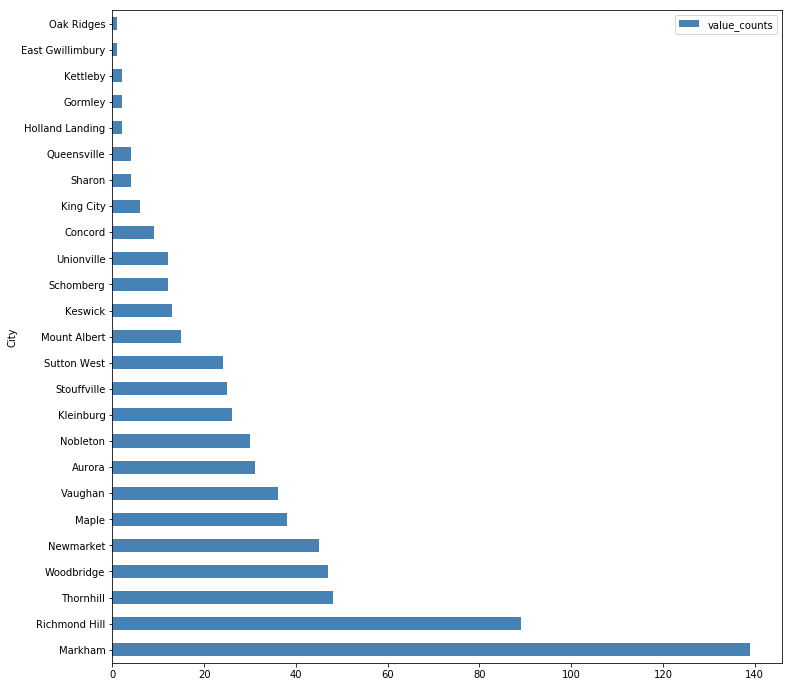

In [126]:
# create a bar plot to show the distribution of child care units per city
york_bar.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Child Care Centers')
plt.title('Child Care Center distribution per city')
for index, value in enumerate(york_bar): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
plt.show()

In [70]:
#load data that was previously scraped from York regions generic website. Data set includes Programs available in York region for Child Care, Capacity and Vacancy numbers. 
url='https://gist.github.com/6d6cc1b7e2e5504cce039f986fc6a501'
response = requests.get(url)

#Process and convert html data
data = response.text
soup = BeautifulSoup(data,'html.parser')
table_wikipedia1=soup.find('table')

#Create the pandas dataframe
program_df = pd.read_html(str(table_wikipedia1))[0]
program_df.head()

Unnamed: 0  GCX_OID                    Program Available  Capacity  \
0         NaN        0                     Infant        No         0   
1         NaN        0                   Toddlers        No         0   
2         NaN        0                  Preschool        No         0   
3         NaN        0               Kindergarten        No         0   
4         NaN        0  Primary/Junior School Age       Yes        54   

   Vacancies  Waitlist  
0          0         0  
1          0         0  
2          0         0  
3          0         0  
4         22         0

We'll work with the data a bit to just keep what we need.

In [71]:
#drop index
program_df.drop(program_df.columns[0], axis=1, inplace=True)
program_df.head()

GCX_OID                    Program Available  Capacity  Vacancies  Waitlist
0        0                     Infant        No         0          0         0
1        0                   Toddlers        No         0          0         0
2        0                  Preschool        No         0          0         0
3        0               Kindergarten        No         0          0         0
4        0  Primary/Junior School Age       Yes        54         22         0

In [72]:
#set the dataset index as teh GCX_OID
program_df.set_index('GCX_OID', inplace=True)
program_df.head()

Program Available  Capacity  Vacancies  Waitlist
GCX_OID                                                                    
0                           Infant        No         0          0         0
0                         Toddlers        No         0          0         0
0                        Preschool        No         0          0         0
0                     Kindergarten        No         0          0         0
0        Primary/Junior School Age       Yes        54         22         0

In [73]:
#filter data set to only show which centers offer a specific Program.
df1 = program_df[(program_df['Available'] == 'Yes')]
df1.head()

Program Available  Capacity  Vacancies  Waitlist
GCX_OID                                                                    
0        Primary/Junior School Age       Yes        54         22         0
1        Primary/Junior School Age       Yes       150         15         0
2                         Toddlers       Yes        20          4         8
2                        Preschool       Yes        32         20        15
3                     Kindergarten       Yes        80         22         0

In [74]:
df1['Program'].value_counts()

Kindergarten                 355
Preschool                    347
Primary/Junior School Age    341
Toddlers                     294
Infant                       134
Junior School Age             33
Name: Program, dtype: int64

In [75]:
#filter dataset to only show Centers with Infant and Toddler programs
df2 = df1[(df1.Program.isin(["Infant","Toddlers"]))]
df2.head(10)

Program Available  Capacity  Vacancies  Waitlist
GCX_OID                                                   
2        Toddlers       Yes        20          4         8
6        Toddlers       Yes        30          0         0
8        Toddlers       Yes        15          5         9
10         Infant       Yes        10          0         0
10       Toddlers       Yes        30          0         0
16         Infant       Yes        10          9         0
16       Toddlers       Yes        15          5         0
17       Toddlers       Yes        12          0         0
20       Toddlers       Yes        15          0         0
23       Toddlers       Yes        24          0         0

In [76]:
#drop the Available column as it is not necessery anymore
df2.drop(['Available'], axis=1, inplace=True)
df2.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Program  Capacity  Vacancies  Waitlist
GCX_OID                                         
2        Toddlers        20          4         8
6        Toddlers        30          0         0
8        Toddlers        15          5         9
10         Infant        10          0         0
10       Toddlers        30          0         0

In [77]:
#filter to show only Infant Programs
dfIP = df2[(df2.Program.isin(["Infant"]))]
dfIP.head()

Program  Capacity  Vacancies  Waitlist
GCX_OID                                       
10       Infant        10          0         0
16       Infant        10          9         0
27       Infant        10          3         7
36       Infant        20         17         0
41       Infant        10          9         0

In [78]:
dfIP.describe()

Capacity   Vacancies    Waitlist
count  134.000000  134.000000  134.000000
mean     9.507463    5.597015    0.880597
std      4.439648    4.226873    3.459855
min      0.000000    0.000000    0.000000
25%      9.000000    3.000000    0.000000
50%     10.000000    6.000000    0.000000
75%     10.000000    8.000000    0.000000
max     20.000000   20.000000   30.000000

In [79]:
df2.head()

Program  Capacity  Vacancies  Waitlist
GCX_OID                                         
2        Toddlers        20          4         8
6        Toddlers        30          0         0
8        Toddlers        15          5         9
10         Infant        10          0         0
10       Toddlers        30          0         0

In [80]:
df2.describe(include=['object'])

Program
count        428
unique         2
top     Toddlers
freq         294

In [81]:
dfTP = df2[(df2.Program.isin(["Toddlers"]))]
dfTP.head()

Program  Capacity  Vacancies  Waitlist
GCX_OID                                         
2        Toddlers        20          4         8
6        Toddlers        30          0         0
8        Toddlers        15          5         9
10       Toddlers        30          0         0
16       Toddlers        15          5         0

In [82]:
dfIP.describe(include=['object'])

Program
count      134
unique       1
top     Infant
freq       134

In [83]:
dfTP.describe(include=['object'])

Program
count        294
unique         1
top     Toddlers
freq         294

In [84]:
#Save dataset
df2.to_csv('Programs.csv', index=False)
print('Saved!')

Saved!


In [85]:
#Scrape data for Market rates for the York region child care centers
url='https://gist.github.com/1ae25c153e580e1a1f7030e7d52629f4'
response = requests.get(url)

#Process and convert html data
data = response.text
soup = BeautifulSoup(data,'html.parser')
table_wikipedia2=soup.find('table')

#Create the pandas dataframe
marketrates_df = pd.read_html(str(table_wikipedia2))[0]
marketrates_df.head()


Unnamed: 0  GCX_OID            CareDescription    AgeGroup MarketRate
0         NaN        0    School Age After School  School Age     $14.21
1         NaN        0  School Age Before & After  School Age     $15.26
2         NaN        0   School Age Before School  School Age      $7.13
3         NaN        0        School Age Full Day  School Age     $46.00
4         NaN        1  Kindergarten After School   Preschool     $21.00

In [86]:
marketrates_df.drop(marketrates_df.columns[0], axis=1, inplace=True)
marketrates_df.set_index('GCX_OID', inplace=True)
marketrates_df.head()

CareDescription    AgeGroup MarketRate
GCX_OID                                                  
0          School Age After School  School Age     $14.21
0        School Age Before & After  School Age     $15.26
0         School Age Before School  School Age      $7.13
0              School Age Full Day  School Age     $46.00
1        Kindergarten After School   Preschool     $21.00

In [87]:
marketrates_df['CareDescription'].value_counts()

Kindergarten Full Day                     390
School Age Full Day                       340
School Age Before & After                 333
Kindergarten Before & After               325
School Age After School                   322
Kindergarten After School                 321
School Age Before School                  320
Kindergarten Before School                310
Preschool Full Day                        299
Toddler Full Day                          275
Infant Full Day                           132
Preschool Half Day                         83
Toddler Half Day                           63
Kindergarten Half Day                      37
Nursery School                             27
Infant Half Day                            19
Emergency Toddler Full Day                 11
Emergency School Age Full Day              11
Emergency Preschool Full Day               11
Emergency Infant Full Day                  11
H Infant Full Day                           9
H Toddler Full Day                

In [88]:
df3 = marketrates_df[(marketrates_df.CareDescription.isin(["Toddler Full Day","Infant Full Day","Toddler Half Day","Nursery School","Infant Half Day","Emergency Toddler Full Day","Emergency Infant Full Day","H Infant Full Day","H Toddler Full Day","Emergency Infant Extended Day","Emergency Toddler Extended Day","H Toddler Part Day","H Toddler Half Day","H Infant Half Day","H Infant Part Day"]))]

In [89]:
df3.head(10)

CareDescription   AgeGroup MarketRate
GCX_OID                                        
2        Toddler Full Day    Toddler     $52.00
2          Nursery School  Preschool     $20.80
4        Toddler Full Day    Toddler     $58.48
8        Toddler Full Day    Toddler     $54.48
10        Infant Full Day     Infant     $75.50
10       Toddler Full Day    Toddler     $60.75
16        Infant Full Day     Infant     $62.07
16       Toddler Full Day    Toddler     $52.87
17       Toddler Full Day    Toddler     $61.36
17       Toddler Half Day    Toddler     $39.27

In [90]:
df3.dtypes

CareDescription    object
AgeGroup           object
MarketRate         object
dtype: object

In [91]:
df3['MarketRate'] = df3['MarketRate'].str.replace('$', '')
df3['MarketRate'] = df3['MarketRate'].astype(int)
df3.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


ValueError: invalid literal for int() with base 10: '52.00'

In [92]:
df3.head()

CareDescription   AgeGroup MarketRate
GCX_OID                                        
2        Toddler Full Day    Toddler      52.00
2          Nursery School  Preschool      20.80
4        Toddler Full Day    Toddler      58.48
8        Toddler Full Day    Toddler      54.48
10        Infant Full Day     Infant      75.50

In [93]:
#show rates for Infant programs only
df3INF = df3[(df3.AgeGroup.isin(["Infant"]))]
df3INF.head()

CareDescription AgeGroup MarketRate
GCX_OID                                               
10                 Infant Full Day   Infant      75.50
16                 Infant Full Day   Infant      62.07
27                 Infant Full Day   Infant      77.60
27       Emergency Infant Full Day   Infant      67.87
36                 Infant Full Day   Infant      68.97

In [94]:
#check top 10 highest prices for Infant programs
df3INF.groupby('MarketRate').head(10)

CareDescription AgeGroup MarketRate
GCX_OID                                                   
10                     Infant Full Day   Infant      75.50
16                     Infant Full Day   Infant      62.07
27                     Infant Full Day   Infant      77.60
27           Emergency Infant Full Day   Infant      67.87
36                     Infant Full Day   Infant      68.97
36                     Infant Half Day   Infant      45.75
41                     Infant Full Day   Infant      78.00
47                     Infant Full Day   Infant      72.50
47                     Infant Half Day   Infant      56.25
50                     Infant Full Day   Infant      68.74
50                     Infant Half Day   Infant      50.00
57                     Infant Full Day   Infant      73.56
58                     Infant Full Day   Infant      65.00
59                     Infant Full Day   Infant      72.64
62                     Infant Full Day   Infant      70.00
63                     Infant Full Day   Infant      82.50
63       Emergency Infant Extended Day   Infant     107.36
63           Emergency Infant Full Day   Infant      67.87
64                     Infant Full Day   Infant      85.90
68                     Infant Full Day   Infant      80.46
78                     Infant Full Day   Infant      75.86
80                     Infant Full Day   Infant      71.20
83                     Infant Full Day   Infant      75.00
83                     Infant Half Day   Infant      68.00
84                     Infant Full Day   Infant      91.31
87                     Infant Full Day   Infant      79.00
90                   H Infant Full Day   Infant      49.00
90                   H Infant Half Day   Infant      42.00
90                   H Infant Part Day   Infant      34.00
91                     Infant Full Day   Infant      69.89
94                     Infant Full Day   Infant      62.85
106                    Infant Full Day   Infant      72.50
106                    Infant Half Day   Infant      56.25
107                    Infant Full Day   Infant      63.00
108                    Infant Full Day   Infant      71.03
108      Emergency Infant Extended Day   Infant     107.36
108          Emergency Infant Full Day   Infant      67.87
111                  H Infant Full Day   Infant      49.00
111                  H Infant Half Day   Infant      42.00
111                  H Infant Part Day   Infant      34.00
115                    Infant Full Day   Infant      77.93
116                    Infant Full Day   Infant      54.00
117                    Infant Full Day   Infant      61.66
118                    Infant Full Day   Infant      80.00
119                    Infant Full Day   Infant      64.37
120                    Infant Full Day   Infant      79.69
123                    Infant Full Day   Infant      79.50
123                    Infant Half Day   Infant      67.50
123      Emergency Infant Extended Day   Infant     107.36
123          Emergency Infant Full Day   Infant      67.87
125                  H Infant Full Day   Infant      60.00
125                  H Infant Half Day   Infant      45.00
125                  H Infant Part Day   Infant      36.00
139                    Infant Full Day   Infant      68.25
141                    Infant Full Day   Infant      77.93
145                    Infant Full Day   Infant      68.97
158                    Infant Full Day   Infant      69.50
163                    Infant Full Day   Infant      69.56
163                    Infant Half Day   Infant      35.00
165                    Infant Full Day   Infant      77.93
166                    Infant Full Day   Infant      67.36
169                    Infant Full Day   Infant      65.29
169                    Infant Half Day   Infant      34.02
174                  H Infant Full Day   Infant      48.00
177                    Infant Full Day   Infant      63.00
181                    Infant Full Day   Infant      67.31
190        

In [95]:
#Check top 10 lowest prices for Infant program
df3INF.groupby('MarketRate').tail(10)

CareDescription AgeGroup MarketRate
GCX_OID                                                   
10                     Infant Full Day   Infant      75.50
16                     Infant Full Day   Infant      62.07
27                     Infant Full Day   Infant      77.60
36                     Infant Full Day   Infant      68.97
36                     Infant Half Day   Infant      45.75
41                     Infant Full Day   Infant      78.00
47                     Infant Full Day   Infant      72.50
47                     Infant Half Day   Infant      56.25
50                     Infant Full Day   Infant      68.74
50                     Infant Half Day   Infant      50.00
57                     Infant Full Day   Infant      73.56
58                     Infant Full Day   Infant      65.00
59                     Infant Full Day   Infant      72.64
62                     Infant Full Day   Infant      70.00
63                     Infant Full Day   Infant      82.50
63       Emergency Infant Extended Day   Infant     107.36
63           Emergency Infant Full Day   Infant      67.87
64                     Infant Full Day   Infant      85.90
68                     Infant Full Day   Infant      80.46
78                     Infant Full Day   Infant      75.86
80                     Infant Full Day   Infant      71.20
83                     Infant Full Day   Infant      75.00
83                     Infant Half Day   Infant      68.00
84                     Infant Full Day   Infant      91.31
87                     Infant Full Day   Infant      79.00
90                   H Infant Full Day   Infant      49.00
90                   H Infant Half Day   Infant      42.00
90                   H Infant Part Day   Infant      34.00
91                     Infant Full Day   Infant      69.89
94                     Infant Full Day   Infant      62.85
106                    Infant Full Day   Infant      72.50
106                    Infant Half Day   Infant      56.25
107                    Infant Full Day   Infant      63.00
108                    Infant Full Day   Infant      71.03
108      Emergency Infant Extended Day   Infant     107.36
108          Emergency Infant Full Day   Infant      67.87
111                  H Infant Full Day   Infant      49.00
111                  H Infant Half Day   Infant      42.00
111                  H Infant Part Day   Infant      34.00
115                    Infant Full Day   Infant      77.93
116                    Infant Full Day   Infant      54.00
117                    Infant Full Day   Infant      61.66
118                    Infant Full Day   Infant      80.00
119                    Infant Full Day   Infant      64.37
120                    Infant Full Day   Infant      79.69
123                    Infant Full Day   Infant      79.50
123                    Infant Half Day   Infant      67.50
123      Emergency Infant Extended Day   Infant     107.36
123          Emergency Infant Full Day   Infant      67.87
125                  H Infant Full Day   Infant      60.00
125                  H Infant Half Day   Infant      45.00
125                  H Infant Part Day   Infant      36.00
139                    Infant Full Day   Infant      68.25
141                    Infant Full Day   Infant      77.93
145                    Infant Full Day   Infant      68.97
158                    Infant Full Day   Infant      69.50
163                    Infant Full Day   Infant      69.56
163                    Infant Half Day   Infant      35.00
165                    Infant Full Day   Infant      77.93
166                    Infant Full Day   Infant      67.36
169                    Infant Full Day   Infant      65.29
169                    Infant Half Day   Infant      34.02
174                  H Infant Full Day   Infant      48.00
177                    Infant Full Day   Infant      63.00
181                    Infant Full Day   Infant      67.31
190                    Infant Full Day   Infant      64.00
194        

In [96]:
#Check how many full day vs half day there are for Infants
df3INF['CareDescription'].value_counts()

Infant Full Day                  132
Infant Half Day                   19
Emergency Infant Full Day         11
H Infant Full Day                  9
Emergency Infant Extended Day      8
H Infant Half Day                  7
H Infant Part Day                  7
Name: CareDescription, dtype: int64

In [97]:
#Show rates for toddler programs only
df3TDL = df3[(df3.AgeGroup.isin(["Toddler"]))]
df3TDL.head()

CareDescription AgeGroup MarketRate
GCX_OID                                      
2        Toddler Full Day  Toddler      52.00
4        Toddler Full Day  Toddler      58.48
8        Toddler Full Day  Toddler      54.48
10       Toddler Full Day  Toddler      60.75
16       Toddler Full Day  Toddler      52.87

In [98]:
#check top 10 highest prices for Toddler programs
df3TDL.groupby('MarketRate').head(10)

CareDescription AgeGroup MarketRate
GCX_OID                                                    
2                      Toddler Full Day  Toddler      52.00
4                      Toddler Full Day  Toddler      58.48
8                      Toddler Full Day  Toddler      54.48
10                     Toddler Full Day  Toddler      60.75
16                     Toddler Full Day  Toddler      52.87
17                     Toddler Full Day  Toddler      61.36
17                     Toddler Half Day  Toddler      39.27
27                     Toddler Full Day  Toddler      59.60
27           Emergency Toddler Full Day  Toddler      53.58
28                     Toddler Full Day  Toddler      44.83
30                     Toddler Full Day  Toddler      52.00
32                     Toddler Full Day  Toddler      60.41
34                     Toddler Full Day  Toddler      51.50
36                     Toddler Full Day  Toddler      53.10
36                     Toddler Half Day  Toddler      36.78
37                     Toddler Full Day  Toddler      58.62
39                     Toddler Full Day  Toddler      60.41
41                     Toddler Full Day  Toddler      71.00
44                     Toddler Full Day  Toddler      58.39
44                     Toddler Half Day  Toddler      47.00
46                     Toddler Full Day  Toddler      61.61
46                     Toddler Half Day  Toddler      33.33
47                     Toddler Full Day  Toddler      58.55
49                     Toddler Full Day  Toddler      50.99
50                     Toddler Full Day  Toddler      62.07
50                     Toddler Half Day  Toddler      47.00
53                     Toddler Full Day  Toddler      52.00
57                     Toddler Full Day  Toddler      65.29
58                     Toddler Full Day  Toddler      60.00
59                     Toddler Full Day  Toddler      62.53
62                     Toddler Full Day  Toddler      61.50
63                     Toddler Full Day  Toddler      65.00
63       Emergency Toddler Extended Day  Toddler      87.06
63           Emergency Toddler Full Day  Toddler      53.58
64                     Toddler Full Day  Toddler      75.90
66                     Toddler Full Day  Toddler      64.37
66                     Toddler Half Day  Toddler      41.38
67                     Toddler Full Day  Toddler      49.00
68                     Toddler Full Day  Toddler      66.67
70                     Toddler Full Day  Toddler      52.00
75                     Toddler Full Day  Toddler      55.25
78                     Toddler Full Day  Toddler      58.39
80                     Toddler Full Day  Toddler      53.80
82                     Toddler Full Day  Toddler      62.00
83                     Toddler Full Day  Toddler      65.00
83                     Toddler Half Day  Toddler      60.00
84                     Toddler Full Day  Toddler      85.52
85                     Toddler Full Day  Toddler      49.89
87                     Toddler Full Day  Toddler      59.00
88                     Toddler Full Day  Toddler      49.89
89                     Toddler Full Day  Toddler      57.47
90                   H Toddler Full Day  Toddler      49.00
90                   H Toddler Half Day  Toddler      42.00
90                   H Toddler Part Day  Toddler      34.00
91                     Toddler Full Day  Toddler      59.08
91                     Toddler Half Day  Toddler      51.49
92                     Toddler Full Day  Toddler      54.25
92                     Toddler Half Day  Toddler      44.14
94                     Toddler Full Day  Toddler      50.84
95                     Toddler Full Day  Toddler      55.17
98                     Toddler Full Day  Toddler      60.53
98                     Toddler Half Day  Toddler      30.65
101                    Toddler Full Day  Toddler      54.25
105                    Toddler Full Day  Toddler      65.66
105                    Toddler Half Day  Toddler      39.86
106 

In [99]:
#Check top 10 lowest prices for Toddler program
df3TDL.groupby('MarketRate').tail(10)

CareDescription AgeGroup MarketRate
GCX_OID                                                    
4                      Toddler Full Day  Toddler      58.48
8                      Toddler Full Day  Toddler      54.48
10                     Toddler Full Day  Toddler      60.75
16                     Toddler Full Day  Toddler      52.87
17                     Toddler Full Day  Toddler      61.36
17                     Toddler Half Day  Toddler      39.27
27                     Toddler Full Day  Toddler      59.60
28                     Toddler Full Day  Toddler      44.83
34                     Toddler Full Day  Toddler      51.50
36                     Toddler Full Day  Toddler      53.10
36                     Toddler Half Day  Toddler      36.78
37                     Toddler Full Day  Toddler      58.62
41                     Toddler Full Day  Toddler      71.00
44                     Toddler Full Day  Toddler      58.39
44                     Toddler Half Day  Toddler      47.00
46                     Toddler Full Day  Toddler      61.61
46                     Toddler Half Day  Toddler      33.33
47                     Toddler Full Day  Toddler      58.55
49                     Toddler Full Day  Toddler      50.99
50                     Toddler Full Day  Toddler      62.07
50                     Toddler Half Day  Toddler      47.00
57                     Toddler Full Day  Toddler      65.29
58                     Toddler Full Day  Toddler      60.00
59                     Toddler Full Day  Toddler      62.53
62                     Toddler Full Day  Toddler      61.50
63                     Toddler Full Day  Toddler      65.00
63       Emergency Toddler Extended Day  Toddler      87.06
63           Emergency Toddler Full Day  Toddler      53.58
64                     Toddler Full Day  Toddler      75.90
66                     Toddler Full Day  Toddler      64.37
66                     Toddler Half Day  Toddler      41.38
67                     Toddler Full Day  Toddler      49.00
68                     Toddler Full Day  Toddler      66.67
75                     Toddler Full Day  Toddler      55.25
78                     Toddler Full Day  Toddler      58.39
80                     Toddler Full Day  Toddler      53.80
82                     Toddler Full Day  Toddler      62.00
83                     Toddler Full Day  Toddler      65.00
83                     Toddler Half Day  Toddler      60.00
84                     Toddler Full Day  Toddler      85.52
85                     Toddler Full Day  Toddler      49.89
87                     Toddler Full Day  Toddler      59.00
88                     Toddler Full Day  Toddler      49.89
89                     Toddler Full Day  Toddler      57.47
90                   H Toddler Full Day  Toddler      49.00
90                   H Toddler Half Day  Toddler      42.00
90                   H Toddler Part Day  Toddler      34.00
91                     Toddler Full Day  Toddler      59.08
91                     Toddler Half Day  Toddler      51.49
92                     Toddler Full Day  Toddler      54.25
92                     Toddler Half Day  Toddler      44.14
94                     Toddler Full Day  Toddler      50.84
95                     Toddler Full Day  Toddler      55.17
98                     Toddler Full Day  Toddler      60.53
98                     Toddler Half Day  Toddler      30.65
101                    Toddler Full Day  Toddler      54.25
105                    Toddler Full Day  Toddler      65.66
105                    Toddler Half Day  Toddler      39.86
106                    Toddler Full Day  Toddler      58.55
106                    Toddler Half Day  Toddler      44.00
107                    Toddler Full Day  Toddler      55.60
107                    Toddler Half Day  Toddler      57.00
108                    Toddler Full Day  Toddler      59.54
108      Emergency Toddler Extended Day  Toddler      87.06
108          Emergency Toddler Full Day  Toddler      53.58
111 

In [100]:
#Check how many full day vs half day there are for Toddlers
df3TDL['CareDescription'].value_counts()

Toddler Full Day                  275
Toddler Half Day                   63
Emergency Toddler Full Day         11
H Toddler Full Day                  9
Emergency Toddler Extended Day      8
H Toddler Part Day                  7
H Toddler Half Day                  7
Name: CareDescription, dtype: int64

In [101]:
df3INF[["MarketRate"]] = df3INF[["MarketRate"]].astype("float")

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [102]:
#Define bin min and max in order to be able to plot them later on and understand a distribution of prices
bins = np.linspace(min(df3INF["MarketRate"]), max(df3INF["MarketRate"]), 4)
bins

array([ 22.5       ,  50.78666667,  79.07333333, 107.36      ])

In [103]:
#define bin Categories
group_namesINF = ['Low', 'Medium', 'High']

In [104]:
#group market rates into bins
df3INF['MarketRate1-binned'] = pd.cut(df3INF['MarketRate'], bins, labels=group_namesINF, include_lowest=True )
df3INF[['MarketRate','MarketRate1-binned']].head(20)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


MarketRate MarketRate1-binned
GCX_OID                               
10            75.50             Medium
16            62.07             Medium
27            77.60             Medium
27            67.87             Medium
36            68.97             Medium
36            45.75                Low
41            78.00             Medium
47            72.50             Medium
47            56.25             Medium
50            68.74             Medium
50            50.00                Low
57            73.56             Medium
58            65.00             Medium
59            72.64             Medium
62            70.00             Medium
63            82.50               High
63           107.36               High
63            67.87             Medium
64            85.90               High
68            80.46               High

In [105]:
df3INF["MarketRate1-binned"].value_counts()

Medium    138
Low        28
High       27
Name: MarketRate1-binned, dtype: int64

Text(0.5, 1.0, 'Market Rate Infants')

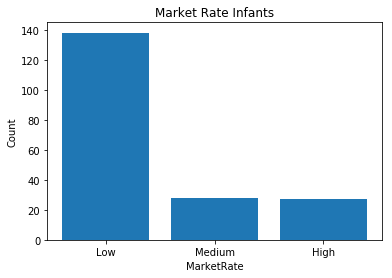

In [106]:
#plot the market rates for Infant data
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_namesINF, df3INF["MarketRate1-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("MarketRate")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Market Rate Infants")

In [107]:
#Define bins for Toddler market rates 
df3TDL[["MarketRate"]] = df3TDL[["MarketRate"]].astype("float")

In [108]:
bins = np.linspace(min(df3TDL["MarketRate"]), max(df3TDL["MarketRate"]), 4)
bins

array([22.5       , 45.23666667, 67.97333333, 90.71      ])

In [109]:
group_namesTDL = ['Low', 'Medium', 'High']

In [110]:
df3TDL['MarketRate2-binned'] = pd.cut(df3TDL['MarketRate'], bins, labels=group_namesTDL, include_lowest=True )
df3TDL[['MarketRate','MarketRate2-binned']].head(20)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


MarketRate MarketRate2-binned
GCX_OID                               
2             52.00             Medium
4             58.48             Medium
8             54.48             Medium
10            60.75             Medium
16            52.87             Medium
17            61.36             Medium
17            39.27                Low
27            59.60             Medium
27            53.58             Medium
28            44.83                Low
30            52.00             Medium
32            60.41             Medium
34            51.50             Medium
36            53.10             Medium
36            36.78                Low
37            58.62             Medium
39            60.41             Medium
41            71.00               High
44            58.39             Medium
44            47.00             Medium

In [111]:
df3TDL["MarketRate2-binned"].value_counts()

Medium    289
Low        64
High       27
Name: MarketRate2-binned, dtype: int64

Text(0.5, 1.0, 'Market Rate Toddlers')

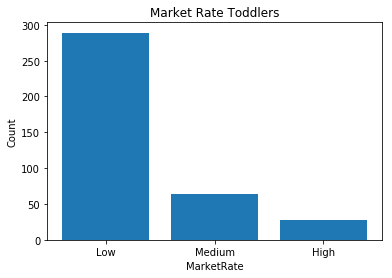

In [112]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_namesTDL, df3TDL["MarketRate2-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("MarketRate")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Market Rate Toddlers")

In [113]:
#Save dataset
marketrates_df.to_csv('MarketRates.csv', index=False)
print('Saved!')

Saved!


### Foursquare API for data on child care locations and neighbourhood soroundings

### Define Foursquare Credentials and Version

In [114]:
CLIENT_ID = 'S2L13KRSC4OFXLSPBT2IKLOWSP245UGQUILLAALYDCW1M2TP' # your Foursquare ID
CLIENT_SECRET = 'T2HKG0WWBEKYU1O5EV223MM3MRAGRV1XJ2G2V1MKCO0WHAJJ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: S2L13KRSC4OFXLSPBT2IKLOWSP245UGQUILLAALYDCW1M2TP
CLIENT_SECRET:T2HKG0WWBEKYU1O5EV223MM3MRAGRV1XJ2G2V1MKCO0WHAJJ


We can use the Foursquare API to get the child care center options of each neighborhood. But first, let's get the latitude longitude of Markham.

In [115]:
address = 'Markham, Ontario'

geolocator = Nominatim(user_agent="york_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Markham Region are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Markham Region are 43.8563707, -79.3376825.


In [116]:
gtaraw_df['Borough'].value_counts()

Markham             7
Richmond Hill       4
East Gwillimbury    4
Thornhill           2
Newmarket           2
Aurora              1
Stouffville         1
Name: Borough, dtype: int64

In [117]:
markham_df = gtaraw_df[(gtaraw_df.Borough.isin(["Markham"]))]
markham_df.head()

PostalCode  Borough                            Neighborhood  Latitude  \
2         L6B  Markham  Cornell, Ontario / Box Grove, Ontario)   43.8687   
3         L6C  Markham   Berczy Village / Cachet / Angus Glen)   43.8783   
5         L6E  Markham                         Wismer Commons)   43.8992   
8         L6G  Markham      Downtown Markham / Markham Centre)   43.8458   
14        L3P  Markham                                Central)   43.8793   

    Longitude  
2    -79.2254  
3    -79.3522  
5    -79.2733  
8    -79.3325  
14   -79.2620

In [118]:
#Map of Markham
map_Markham = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)

for lat, lng, nei in zip(gtaraw_df['Latitude'], gtaraw_df['Longitude'], gtaraw_df['Borough']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Markham)  
    
map_Markham

In [119]:
address = 'Markham, Ontario'

geolocator = Nominatim(user_agent="york_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Markham Region are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Markham Region are 43.8563707, -79.3376825.


In [120]:
radius = 70000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
   longitude, 
    radius, 
   LIMIT)
results = requests.get(url).json()
print(results)

{'meta': {'code': 200, 'requestId': '5fb6af9cf5f91049c0a877e1'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Markham', 'headerFullLocation': 'Markham', 'headerLocationGranularity': 'city', 'totalResults': 238, 'suggestedBounds': {'ne': {'lat': 44.48637133000063, 'lng': -78.46562212313358}, 'sw': {'lat': 43.22637006999937, 'lng': -80.20974287686641}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4bb656b96edc76b0b5c7301c', 'name': 'Toogood Pond', 'location': {'address': 'Carlton Rd.', 'crossStreet': 'near Main St.', 'lat': 43.87070091837325, 'lng': -79.31380256550239, 'labeledLatLngs': [{'label': 'display', 'lat': 43.87070091837325, 'lng': -79.31380256550239}], 'distance': 2493, 'postalCode': 'L3R 4J8', 'cc': 'CA', 'city':

In [121]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['reasons.count', 'reasons.items', 'referralId', 'venue.categories',
       'venue.id', 'venue.location.address', 'venue.location.cc',
       'venue.location.city', 'venue.location.country',
       'venue.location.crossStreet', 'venue.location.distance',
       'venue.location.formattedAddress', 'venue.location.labeledLatLngs',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.neighborhood', 'venue.location.postalCode',
       'venue.location.state', 'venue.name', 'venue.photos.count',
       'venue.photos.groups', 'venue.venuePage.id'],
      dtype='object')

In [122]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [123]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

venue.name  \
0                Toogood Pond   
1  Old Firehall Confectionary   
2                Maryam Hotel   
3              Mill Pond Park   
4                 Mona's Roti   

                                    venue.categories  venue.location.lat  \
0  [{'id': '4bf58dd8d48988d163941735', 'name': 'P...           43.870701   
1  [{'id': '4bf58dd8d48988d1d0941735', 'name': 'D...           43.867126   
2  [{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...           43.766961   
3  [{'id': '4bf58dd8d48988d163941735', 'name': 'P...           43.876041   
4  [{'id': '4bf58dd8d48988d144941735', 'name': 'C...           43.791613   

   venue.location.lng  
0          -79.313803  
1          -79.312084  
2          -79.401199  
3          -79.452215  
4          -79.251015

In [124]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(5)

name            categories        lat        lng
0                Toogood Pond                  Park  43.870701 -79.313803
1  Old Firehall Confectionary          Dessert Shop  43.867126 -79.312084
2                Maryam Hotel                 Hotel  43.766961 -79.401199
3              Mill Pond Park                  Park  43.876041 -79.452215
4                 Mona's Roti  Caribbean Restaurant  43.791613 -79.251015

In [125]:
# Top 10 Categories
a=pd.Series(nearby_venues.categories)
a.value_counts()[:10]

Park                     7
Dessert Shop             2
Caribbean Restaurant     2
Clothing Store           1
Fish & Chips Shop        1
History Museum           1
Athletics & Sports       1
Sandwich Place           1
Farmers Market           1
Vietnamese Restaurant    1
Name: categories, dtype: int64

In [126]:
#define a function that runs through all neighbourhoods
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitude, 
            longitude, 
            radius, 
            LIMIT)
            
        # making GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [127]:
#nearby venues
Markham_venues = getNearbyVenues(names=gtaraw_df['Borough'],
                                   latitudes=gtaraw_df['Latitude'],
                                   longitudes=gtaraw_df['Longitude']
                                  )

Stouffville
Richmond Hill
Markham
Markham
Richmond Hill
Markham
Richmond Hill
Aurora
Markham
Thornhill
East Gwillimbury
East Gwillimbury
East Gwillimbury
East Gwillimbury
Markham
Markham
Markham
Richmond Hill
Thornhill
Newmarket
Newmarket


In [128]:
# one hot encoding
Markham_onehot = pd.get_dummies(Markham_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Markham_onehot['Borough'] = Markham_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [Markham_onehot.columns[-1]] + list(Markham_onehot.columns[:-1])
Markham_onehot = Markham_onehot[fixed_columns]
Markham_grouped = Markham_onehot.groupby('Borough').mean().reset_index()
Markham_onehot.head(5)

Borough  Bakery  Bank  Bar  Cantonese Restaurant  Dessert Shop  Diner  \
0  Stouffville       0     0    0                     0             0      0   
1  Stouffville       0     0    0                     0             0      0   
2  Stouffville       0     0    0                     0             0      0   
3  Stouffville       0     0    0                     0             0      0   
4  Stouffville       1     0    0                     0             0      0   

   Fast Food Restaurant  Food  Grocery Store  Gym / Fitness Center  \
0                     0     0              0                     0   
1                     0     0              0                     0   
2                     0     0              0                     0   
3                     0     0              0                     0   
4                     0     0              0                     0   

   Hobby Shop  Hotel  Japanese Restaurant  Juice Bar  Night Market  \
0           0      0                    0          0             0   
1           1      0                    0          0             0   
2           0      1                    0          0             0   
3           0      0                    0          0             0   
4           0      0                    0          0             0   

   Noodle House  Park  Pharmacy  Pizza Place  Pub  Restaurant  Shopping Mall  \
0             0     0         0            0    0           0              0   
1             0     0         0            0    0           0              0   
2             0     0         0            0    0           0              0   
3             0     0         0            0    0           0              0   
4             0     0         0            0    0           0              0   

   Spa  Sushi Restaurant  Theater  Toy / Game Store  Yoga Studio  
0    1                 0        0                 0            0  
1    0                 0        0                 0            0  
2    0                 0        0                 0            0  
3    0                 0        1                 0            0  
4    0                 0        0                 0            0

In [129]:
num_top_venues = 5
for hood in Markham_grouped['Borough']:
    print("---- "+hood+" ----")
    temp =Markham_grouped[Markham_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Aurora ----
              venue  freq
0            Bakery  0.04
1      Night Market  0.04
2  Toy / Game Store  0.04
3           Theater  0.04
4  Sushi Restaurant  0.04


---- East Gwillimbury ----
              venue  freq
0            Bakery  0.04
1      Night Market  0.04
2  Toy / Game Store  0.04
3           Theater  0.04
4  Sushi Restaurant  0.04


---- Markham ----
              venue  freq
0            Bakery  0.04
1      Night Market  0.04
2  Toy / Game Store  0.04
3           Theater  0.04
4  Sushi Restaurant  0.04


---- Newmarket ----
              venue  freq
0            Bakery  0.04
1      Night Market  0.04
2  Toy / Game Store  0.04
3           Theater  0.04
4  Sushi Restaurant  0.04


---- Richmond Hill ----
              venue  freq
0            Bakery  0.04
1      Night Market  0.04
2  Toy / Game Store  0.04
3           Theater  0.04
4  Sushi Restaurant  0.04


---- Stouffville ----
              venue  freq
0            Bakery  0.04
1      Night Market  0.04
2  T

In [130]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [8]:
#Get data for Child care centers
url='https://gist.github.com/e4f372bf7cedd8f83a08230fdeb81fbd'
response = requests.get(url)

#Process and convert html data
data = response.text
soup = BeautifulSoup(data,'html.parser')
table_wikipedia2=soup.find('table')

#Create the pandas dataframe
ccc_df = pd.read_html(str(table_wikipedia2))[0]
ccc_df.head()

Unnamed: 0  GCX_OID                                               Name  \
0         NaN        0                    Kids Connection @ Beverly Acres   
1         NaN        1  Windham Ridge YMCA Before & After School Age P...   
2         NaN        2                  Vaughan City Hall YMCA Child Care   
3         NaN        3                             John McCrae Child Care   
4         NaN        4                 Armitage Village Child Care Centre   

                                        Organization    ServiceCategory  \
0                   Kids Connection Care & Education  Child Care Centre   
1                            YMCA of Greater Toronto  Child Care Centre   
2                            YMCA of Greater Toronto  Child Care Centre   
3  Upper Canada Creative Child Care Centres of On...  Child Care Centre   
4  Upper Canada Creative Child Care Centres of On...  Child Care Centre   

                      Type                     Address Unit      Community  \
0  Centre Based Child Care              283 Neal Drive  NaN  Richmond Hill   
1  Centre Based Child Care       32 Red Cardinal Trail  NaN  Richmond Hill   
2  Centre Based Child Care  2141 Major Mackenzie Drive  NaN          Maple   
3  Centre Based Child Care  565 Fred McLaren Boulevard  NaN        Markham   
4  Centre Based Child Care             125 Savage Road  NaN      Newmarket   

    Municipality                           MainIntersection PostalCode  \
0  Richmond Hill     Bayview Avenue & Major MacKenzie Drive    L4C 3L3   
1  Richmond Hill            Yonge Street & Bloomington Road    L4E 3Y4   
2        Vaughan  Major Mackenzie Drive West & Keele Street    L6A 1T1   
3        Markham             Major Mackenzie & McCowan Road    L6E 1N7   
4      Newmarket                Yonge Street & Mulock Drive    L3X 1R1   

         ContactName     PhoneNumber PhoneExtension  \
0   Melissa Tawadros  (905) 879-6006            NaN   
1    Monica Tersigni  (416) 561-5900            NaN   
2  Maria Diamantakos  (905) 832-5204            NaN   
3   Stephanie Murray  (905) 202-4310            NaN   
4        Corey Weber  (905) 830-9719            NaN   

                               Website       FaxNumber SchoolBased  \
0      http://www.kidsconnectionce.com  (905) 771-0442         Yes   
1               http://www.ymcagta.org             NaN         Yes   
2               http://www.ymcagta.org  (905) 943-7612          No   
3  http://www.uppercanadachildcare.com  (905) 201-0571         Yes   
4  http://www.uppercanadachildcare.com  (905) 830-1980         Yes   

              SchoolName                            AgeGroups FeeSubsidized  \
0    Beverley Acres P.S.                           School Age           Yes   
1     Windham Ridge P.S.                           School Age           Yes   
2                    NaN                   Toddler, Preschool           Yes   
3       John McCrae P.S.             Kindergarten, School Age           Yes   
4  Armitage Village P.S.  Preschool, Kindergarten, School Age           Yes   

                                      ProgramDetails  
0  Before and After School program - also PA Days...  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4  Directors approval for 3 children 2 to 2.5 in ...

In [9]:
ccc_df.drop(ccc_df.columns[0], axis=1, inplace=True)
ccc_df.set_index('GCX_OID', inplace=True)
ccc_df.head()

Name  \
GCX_OID                                                      
0                          Kids Connection @ Beverly Acres   
1        Windham Ridge YMCA Before & After School Age P...   
2                        Vaughan City Hall YMCA Child Care   
3                                   John McCrae Child Care   
4                       Armitage Village Child Care Centre   

                                              Organization    ServiceCategory  \
GCX_OID                                                                         
0                         Kids Connection Care & Education  Child Care Centre   
1                                  YMCA of Greater Toronto  Child Care Centre   
2                                  YMCA of Greater Toronto  Child Care Centre   
3        Upper Canada Creative Child Care Centres of On...  Child Care Centre   
4        Upper Canada Creative Child Care Centres of On...  Child Care Centre   

                            Type                     Address Unit  \
GCX_OID                                                             
0        Centre Based Child Care              283 Neal Drive  NaN   
1        Centre Based Child Care       32 Red Cardinal Trail  NaN   
2        Centre Based Child Care  2141 Major Mackenzie Drive  NaN   
3        Centre Based Child Care  565 Fred McLaren Boulevard  NaN   
4        Centre Based Child Care             125 Savage Road  NaN   

             Community   Municipality  \
GCX_OID                                 
0        Richmond Hill  Richmond Hill   
1        Richmond Hill  Richmond Hill   
2                Maple        Vaughan   
3              Markham        Markham   
4            Newmarket      Newmarket   

                                  MainIntersection PostalCode  \
GCX_OID                                                         
0           Bayview Avenue & Major MacKenzie Drive    L4C 3L3   
1                  Yonge Street & Bloomington Road    L4E 3Y4   
2        Major Mackenzie Drive West & Keele Street    L6A 1T1   
3                   Major Mackenzie & McCowan Road    L6E 1N7   
4                      Yonge Street & Mulock Drive    L3X 1R1   

               ContactName     PhoneNumber PhoneExtension  \
GCX_OID                                                     
0         Melissa Tawadros  (905) 879-6006            NaN   
1          Monica Tersigni  (416) 561-5900            NaN   
2        Maria Diamantakos  (905) 832-5204            NaN   
3         Stephanie Murray  (905) 202-4310            NaN   
4              Corey Weber  (905) 830-9719            NaN   

                                     Website       FaxNumber SchoolBased  \
GCX_OID                                                                    
0            http://www.kidsconnectionce.com  (905) 771-0442         Yes   
1                     http://www.ymcagta.org             NaN         Yes   
2                     http://www.ymcagta.org  (905) 943-7612          No   
3        http://www.uppercanadachildcare.com  (905) 201-0571         Yes   
4        http://www.uppercanadachildcare.com  (905) 830-1980         Yes   

                    SchoolName                            AgeGroups  \
GCX_OID                                                               
0          Beverley Acres P.S.                           School Age   
1           Windham Ridge P.S.                           School Age   
2                          NaN                   Toddler, Preschool   
3             John McCrae P.S.             Kindergarten, School Age   
4        Armitage Village P.S.  Preschool, Kindergarten, School Age   

        FeeSubsidized                                     ProgramDetails  
GCX_OID                                                                   
0                 Yes  Before and After School program - also PA Days...  
1                 Yes                                                NaN  
2                 Yes                                           

In [10]:
postal_c = ccc_df['PostalCode']
postal_c.head()

GCX_OID
0    L4C 3L3
1    L4E 3Y4
2    L6A 1T1
3    L6E 1N7
4    L3X 1R1
Name: PostalCode, dtype: object

In [11]:
def get_latilong(postal_c):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, Markham, Ontario'.format(postal_c))
        lati_long_coords = g.latlng
    return lati_long_coords
    
get_latilong('L4A',)

[43.85651000000007, -79.33981999999997]

In [12]:
coords = [ get_latilong(postal_c) for postal_c in postal_c.tolist() ]
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [13]:
ccc_df['Latitude'] = df_coords['Latitude']
ccc_df['Longitude'] = df_coords['Longitude']

In [14]:
ccc_df.head(20)

Name  \
GCX_OID                                                      
0                          Kids Connection @ Beverly Acres   
1        Windham Ridge YMCA Before & After School Age P...   
2                        Vaughan City Hall YMCA Child Care   
3                                   John McCrae Child Care   
4                       Armitage Village Child Care Centre   
5                    Newmarket Co-Operative Nursery School   
6                                   Toronto Waldorf School   
7           Our Lady of Hope Before & After School Program   
8                            Harry Bowes Children's Centre   
9                                             Best Friends   
10                              Cedar Glen YMCA Child Care   
11                           Fun On The Run - Holy Jubilee   
12                                    Terry Fox School Age   
13               Poplar Bank Before & After School Program   
14            St. Michael the Archangel School Age Program   
15                             Ross Doan Child Care Centre   
16                              Country Kids Nobleton Inc.   
17                                  Great Lakes Montessori   
18                                                    Pals   
19       Le Club Child Care - School Age Child Care - W...   

                                              Organization    ServiceCategory  \
GCX_OID                                                                         
0                         Kids Connection Care & Education  Child Care Centre   
1                                  YMCA of Greater Toronto  Child Care Centre   
2                                  YMCA of Greater Toronto  Child Care Centre   
3        Upper Canada Creative Child Care Centres of On...  Child Care Centre   
4        Upper Canada Creative Child Care Centres of On...  Child Care Centre   
5              Newmarket Co-Operative Nursery School, Inc.  Child Care Centre   
6                               The Toronto Waldorf School  Child Care Centre   
7           Our Lady of the Annunciation Child Care Centre  Child Care Centre   
8        Upper Canada Creative Child Care Centres of On...  Child Care Centre   
9                                       605061 Ontario Ltd  Child Care Centre   
10                                 YMCA of Greater Toronto  Child Care Centre   
11                        Fun on the Run Pre-School Centre  Child Care Centre   
12                                      Denison Child Care  Child Care Centre   
13                                      Denison Child Care  Child Care Centre   
14                  Community of Maple Child Care Services  Child Care Centre   
15                                Family Day Care Services  Child Care Centre   
16                              Country Kids Nobleton Inc.  Child Care Centre   
17                                    2494290 Ontario Inc.  Child Care Centre   
18                                      605061 Ontario Ltd  Child Care Centre   
19                              Le Club Child Care Program  Child Care Centre   

                              Type                      Address Unit  \
GCX_OID                                                                
0          Centre Based Child Care               283 Neal Drive  NaN   
1          Centre Based Child Care        32 Red Cardinal Trail  NaN   
2          Centre Based Child Care   2141 Major Mackenzie Drive  NaN   
3          Centre Based Child Care   565 Fred McLaren Boulevard  NaN   
4          Centre Based Child Care              125 Savage Road  NaN   
5        Nursery School Child Care              443 Park Avenue  NaN   
6          Centre Based Child Care         9100 Bathurst Street  NaN   
7          Centre Based Child Care        80 Red Cardinal Trail  NaN   
8          Centre Based Child Care            90 Greenwood Road  NaN   
9          Centre Based Child Care              70 Devins Drive  NaN   
10         Centre Based Child Care        

In [15]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [16]:
#check if the Community column holds the names of the neighbourhoods
ccc_df['Community'].value_counts()

Markham             119
Richmond Hill        89
Thornhill            50
Woodbridge           45
Newmarket            43
Vaughan              41
Aurora               34
Maple                30
Stouffville          24
Keswick              11
Unionville           10
Concord               7
King City             6
Kleinburg             5
Sutton West           5
Nobleton              5
Schomberg             4
East Gwillimbury      4
Mount Albert          4
Holland Landing       3
Sharon                2
Newmaket              2
Queensville           2
Oak Ridges            1
Gormley               1
Kettleby              1
Name: Community, dtype: int64

In [17]:
ccc_df.rename({'Community':'Neighboourhoods'}, axis=1, inplace =True)
ccc_df.head()

Name  \
GCX_OID                                                      
0                          Kids Connection @ Beverly Acres   
1        Windham Ridge YMCA Before & After School Age P...   
2                        Vaughan City Hall YMCA Child Care   
3                                   John McCrae Child Care   
4                       Armitage Village Child Care Centre   

                                              Organization    ServiceCategory  \
GCX_OID                                                                         
0                         Kids Connection Care & Education  Child Care Centre   
1                                  YMCA of Greater Toronto  Child Care Centre   
2                                  YMCA of Greater Toronto  Child Care Centre   
3        Upper Canada Creative Child Care Centres of On...  Child Care Centre   
4        Upper Canada Creative Child Care Centres of On...  Child Care Centre   

                            Type                     Address Unit  \
GCX_OID                                                             
0        Centre Based Child Care              283 Neal Drive  NaN   
1        Centre Based Child Care       32 Red Cardinal Trail  NaN   
2        Centre Based Child Care  2141 Major Mackenzie Drive  NaN   
3        Centre Based Child Care  565 Fred McLaren Boulevard  NaN   
4        Centre Based Child Care             125 Savage Road  NaN   

        Neighboourhoods   Municipality  \
GCX_OID                                  
0         Richmond Hill  Richmond Hill   
1         Richmond Hill  Richmond Hill   
2                 Maple        Vaughan   
3               Markham        Markham   
4             Newmarket      Newmarket   

                                  MainIntersection PostalCode  \
GCX_OID                                                         
0           Bayview Avenue & Major MacKenzie Drive    L4C 3L3   
1                  Yonge Street & Bloomington Road    L4E 3Y4   
2        Major Mackenzie Drive West & Keele Street    L6A 1T1   
3                   Major Mackenzie & McCowan Road    L6E 1N7   
4                      Yonge Street & Mulock Drive    L3X 1R1   

               ContactName     PhoneNumber PhoneExtension  \
GCX_OID                                                     
0         Melissa Tawadros  (905) 879-6006            NaN   
1          Monica Tersigni  (416) 561-5900            NaN   
2        Maria Diamantakos  (905) 832-5204            NaN   
3         Stephanie Murray  (905) 202-4310            NaN   
4              Corey Weber  (905) 830-9719            NaN   

                                     Website       FaxNumber SchoolBased  \
GCX_OID                                                                    
0            http://www.kidsconnectionce.com  (905) 771-0442         Yes   
1                     http://www.ymcagta.org             NaN         Yes   
2                     http://www.ymcagta.org  (905) 943-7612          No   
3        http://www.uppercanadachildcare.com  (905) 201-0571         Yes   
4        http://www.uppercanadachildcare.com  (905) 830-1980         Yes   

                    SchoolName                            AgeGroups  \
GCX_OID                                                               
0          Beverley Acres P.S.                           School Age   
1           Windham Ridge P.S.                           School Age   
2                          NaN                   Toddler, Preschool   
3             John McCrae P.S.             Kindergarten, School Age   
4        Armitage Village P.S.  Preschool, Kindergarten, School Age   

        FeeSubsidized                                     ProgramDetails  \
GCX_OID                                                                    
0                 Yes  Before and After School program - also PA Days...   
1                 Yes                                                NaN   
2                 Yes                                

In [18]:
# check how many child care centers are there per neighbourhood
ccc_df['Municipality'].value_counts()

Vaughan                   162
Markham                   146
Richmond Hill              89
Newmarket                  45
Aurora                     34
Whitchurch-Stouffville     25
King                       17
Georgina                   16
East Gwillimbury           14
Name: Municipality, dtype: int64

In [19]:
# Check how many child care centers are present in school environments
ccc_df['SchoolBased'].value_counts()

No     301
Yes    247
Name: SchoolBased, dtype: int64

In [20]:
address = 'Markham, Ontario'

geolocator = Nominatim(user_agent="mkh_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Markham are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Markham are 43.8563707, -79.3376825.


In [21]:
# create map of Markham using latitude and longitude values
map_markham = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(ccc_df['Latitude'], ccc_df['Longitude'], ccc_df['Municipality'], ccc_df['Neighboourhoods']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_markham)  
    
map_markham

### Explore Forsquare data

#### I'm again exploring Forsquare data of Markham's sorounding neighbourhoods but now with the purpose of udnerstanding what is best as a neighbourhood in terms of other facilities in relation to child care centers. 

In [30]:
CLIENT_ID = 'KBCBTHD3UAI4E2JTAOLLAXOQCTLERQX53BDXURQVXEXJSB50' # your Foursquare ID
CLIENT_SECRET = 'BZET4IMN1XB5HNCEKF5LZFVO35QZYPKI3K4ZXKCBLKPMVMSU' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 650
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KBCBTHD3UAI4E2JTAOLLAXOQCTLERQX53BDXURQVXEXJSB50
CLIENT_SECRET:BZET4IMN1XB5HNCEKF5LZFVO35QZYPKI3K4ZXKCBLKPMVMSU


In [31]:
def getNearbyVenues(names, latitudes, longitudes, radius=7000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # making GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighboourhoods', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [32]:
# run the above function for each neighbourhood and create a data farme
mkh_venues = getNearbyVenues(names=ccc_df['Neighboourhoods'],
                                   latitudes=ccc_df['Latitude'],
                                   longitudes=ccc_df['Longitude']
                                  )

Richmond Hill
Richmond Hill
Maple
Markham
Newmarket
Newmarket
Thornhill
Richmond Hill
Stouffville
Aurora
Schomberg
Vaughan
Newmarket
Newmarket
Vaughan
Richmond Hill
Nobleton
Thornhill
Markham
Thornhill
Markham
Nobleton
Markham
Markham
Newmarket
Newmarket
Thornhill
Vaughan
Unionville
Markham
Markham
Aurora
Richmond Hill
Stouffville
Holland Landing
Richmond Hill
Markham
Thornhill
Woodbridge
Markham
Aurora
Markham
Markham
Richmond Hill
Markham
Maple
Richmond Hill
Richmond Hill
Stouffville
Woodbridge
Richmond Hill
Richmond Hill
Stouffville
Newmarket
Woodbridge
Richmond Hill
Markham
Richmond Hill
Schomberg
Vaughan
Maple
Unionville
Maple
Newmaket
Vaughan
Unionville
Maple
Newmarket
Markham
Maple
Markham
Stouffville
Woodbridge
Vaughan
Concord
Markham
Unionville
Richmond Hill
Vaughan
Sharon
Thornhill
Queensville
Richmond Hill
Woodbridge
Richmond Hill
Aurora
Newmarket
Markham
Aurora
Woodbridge
Vaughan
Thornhill
Maple
Aurora
Richmond Hill
Kleinburg
Markham
Thornhill
Woodbridge
Markham
Aurora
Newm

In [33]:
#check the size of the resulting data frame
print(mkh_venues.shape)
mkh_venues.head()

(54590, 7)


Neighboourhoods  Neighborhood Latitude  Neighborhood Longitude  \
0   Richmond Hill               43.88766               -79.42364   
1   Richmond Hill               43.88766               -79.42364   
2   Richmond Hill               43.88766               -79.42364   
3   Richmond Hill               43.88766               -79.42364   
4   Richmond Hill               43.88766               -79.42364   

                                              Venue  Venue Latitude  \
0                                  Joe's Hamburgers       43.891807   
1                                    Mill Pond Park       43.876041   
2  Cosmo Music - The Musical Instrument Superstore!       43.890410   
3                                       Mi Ne Sushi       43.891160   
4      Richmond Hill Centre for the Performing Arts       43.877296   

   Venue Longitude         Venue Category  
0       -79.441453           Burger Joint  
1       -79.452215                   Park  
2       -79.393270            Music Store  
3       -79.441756       Sushi Restaurant  
4       -79.439077  Performing Arts Venue

In [34]:
#check how many venues were returned per neighbourhood
mkh_venues.groupby('Neighboourhoods').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighboourhoods                                                          
Aurora                             3400                    3400   3400   
Concord                             700                     700    700   
East Gwillimbury                    400                     400    400   
Gormley                              82                      82     82   
Holland Landing                     300                     300    300   
Keswick                            1100                    1100   1100   
Kettleby                            100                     100    100   
King City                           600                     600    600   
Kleinburg                           500                     500    500   
Maple                              3000                    3000   3000   
Markham                           11799                   11799  11799   
Mount Albert                        400                     400    400   
Newmaket                            200                     200    200   
Newmarket                          4300                    4300   4300   
Nobleton                            500                     500    500   
Oak Ridges                          100                     100    100   
Queensville                         200                     200    200   
Richmond Hill                      8895                    8895   8895   
Schomberg                           400                     400    400   
Sharon                              200                     200    200   
Stouffville                        2342                    2342   2342   
Sutton West                         500                     500    500   
Thornhill                          4972                    4972   4972   
Unionville                         1000                    1000   1000   
Vaughan                            4100                    4100   4100   
Woodbridge                         4500                    4500   4500   

                  Venue Latitude  Venue Longitude  Venue Category  
Neighboourhoods                                                    
Aurora                      3400             3400            3400  
Concord                      700              700             700  
East Gwillimbury             400              400             400  
Gormley                       82               82              82  
Holland Landing              300              300             300  
Keswick                     1100             1100            1100  
Kettleby                     100              100             100  
King City                    600              600             600  
Kleinburg                    500              500             500  
Maple                       3000             3000            3000  
Markham                    11799            11799           11799  
Mount Albert                 400              400             400  
Newmaket                     200              200             200  
Newmarket                   4300             4300            4300  
Nobleton                     500              500             500  
Oak Ridges                   100              100             100  
Queensville                  200              200             200  
Richmond Hill               8895             8895            8895  
Schomberg                    400              400             400  
Sharon                       200              200             200  
Stouffville                 2342             2342            2342  
Sutton West                  500              500             500  
Thornhill                   4972             4972            4972  
Unionville                  1000             1000            1000  
Vaughan                     4100             4100            4100  
Woodbridge                  4500             4500            4500

In [35]:
#check how many unique categories we have
print('There are {} uniques categories.'.format(len(mkh_venues['Venue Category'].unique())))

There are 166 uniques categories.


## Analyze each neighbourhood

In [36]:
# one hot encoding
mkh_onehot = pd.get_dummies(mkh_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
mkh_onehot['Neighboourhoods'] = mkh_venues['Neighboourhoods'] 

# move neighborhood column to the first column
fixed_columns = [mkh_onehot.columns[-1]] + list(mkh_onehot.columns[:-1])
mkh_onehot = mkh_onehot[fixed_columns]

mkh_onehot.head()

Neighboourhoods  Airport  American Restaurant  Arts & Crafts Store  \
0   Richmond Hill        0                    0                    0   
1   Richmond Hill        0                    0                    0   
2   Richmond Hill        0                    0                    0   
3   Richmond Hill        0                    0                    0   
4   Richmond Hill        0                    0                    0   

   Asian Restaurant  Athletics & Sports  Auto Dealership  Automotive Shop  \
0                 0                   0                0                0   
1                 0                   0                0                0   
2                 0                   0                0                0   
3                 0                   0                0                0   
4                 0                   0                0                0   

   BBQ Joint  Bagel Shop  Bakery  Bank  Bar  Baseball Field  Beer Store  \
0          0           0       0     0    0               0           0   
1          0           0       0     0    0               0           0   
2          0           0       0     0    0               0           0   
3          0           0       0     0    0               0           0   
4          0           0       0     0    0               0           0   

   Bookstore  Bowling Alley  Brazilian Restaurant  Breakfast Spot  Brewery  \
0          0              0                     0               0        0   
1          0              0                     0               0        0   
2          0              0                     0               0        0   
3          0              0                     0               0        0   
4          0              0                     0               0        0   

   Bridal Shop  Bubble Tea Shop  Burger Joint  Butcher  Café  \
0            0                0             1        0     0   
1            0                0             0        0     0   
2            0                0             0        0     0   
3            0                0             0        0     0   
4            0                0             0        0     0   

   Cantonese Restaurant  Caribbean Restaurant  Caucasian Restaurant  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Cheese Shop  Chinese Restaurant  Chocolate Shop  Climbing Gym  \
0            0                   0               0             0   
1            0                   0               0             0   
2            0                   0               0             0   
3            0                   0               0             0   
4            0                   0               0             0   

   Clothing Store  Cocktail Bar  Coffee Shop  Community Center  \
0               0             0            0                 0   
1               0             0            0                 0   
2               0             0            0                 0   
3               0             0            0                 0   
4               0             0            0                 0   

   Construction & Landscaping  Convenience Store  Cosmetics Shop  Creperie  \
0                           0                  0               0         0   
1                           0                  0               0         0   
2                           0                  0               0         0   
3                           0                  0               0         0   
4                           0                  0               0         0   

   Deli / Bodega  Department Store  Dessert Shop  Dim Sum Restaurant  Diner  \
0              0    

In [38]:
#Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
mkh_grouped = mkh_onehot.groupby('Neighboourhoods').mean().reset_index()
mkh_grouped

Neighboourhoods   Airport  American Restaurant  Arts & Crafts Store  \
0             Aurora  0.000000             0.000000             0.000000   
1            Concord  0.000000             0.000000             0.000000   
2   East Gwillimbury  0.000000             0.000000             0.000000   
3            Gormley  0.000000             0.000000             0.000000   
4    Holland Landing  0.000000             0.000000             0.000000   
5            Keswick  0.000000             0.000000             0.000000   
6           Kettleby  0.000000             0.000000             0.000000   
7          King City  0.000000             0.000000             0.000000   
8          Kleinburg  0.000000             0.000000             0.000000   
9              Maple  0.000000             0.000000             0.000000   
10           Markham  0.000170             0.005594             0.000509   
11      Mount Albert  0.000000             0.000000             0.000000   
12          Newmaket  0.000000             0.000000             0.000000   
13         Newmarket  0.000000             0.000000             0.000000   
14          Nobleton  0.000000             0.000000             0.000000   
15        Oak Ridges  0.000000             0.000000             0.000000   
16       Queensville  0.000000             0.000000             0.000000   
17     Richmond Hill  0.001349             0.000000             0.000000   
18         Schomberg  0.000000             0.000000             0.000000   
19            Sharon  0.000000             0.000000             0.000000   
20       Stouffville  0.000000             0.000854             0.000000   
21       Sutton West  0.000000             0.000000             0.000000   
22         Thornhill  0.000603             0.000603             0.000000   
23        Unionville  0.000000             0.000000             0.000000   
24           Vaughan  0.000000             0.000000             0.000000   
25        Woodbridge  0.000000             0.000000             0.000000   

    Asian Restaurant  Athletics & Sports  Auto Dealership  Automotive Shop  \
0           0.020000            0.010000         0.000000         0.010000   
1           0.017143            0.008571         0.000000         0.008571   
2           0.020000            0.010000         0.000000         0.010000   
3           0.012195            0.012195         0.000000         0.000000   
4           0.020000            0.010000         0.000000         0.010000   
5           0.020000            0.010000         0.000000         0.010000   
6           0.020000            0.010000         0.000000         0.010000   
7           0.020000            0.010000         0.000000         0.010000   
8           0.020000            0.010000         0.000000         0.010000   
9           0.019333            0.009667         0.000000         0.009667   
10          0.016188            0.007289         0.000170         0.008306   
11          0.020000            0.010000         0.000000         0.010000   
12          0.020000            0.010000         0.000000         0.010000   
13          0.020000            0.010000         0.000000         0.010000   
14          0.020000            0.010000         0.000000         0.010000   
15          0.000000            0.000000         0.000000         0.000000   
16          0.020000            0.010000         0.000000         0.010000   
17          0.007083            0.000225         0.000225         0.000225   
18          0.020000            0.010000         0.000000         0.010000   
19          0.020000            0.010000         0.000000         0.010000   
20          0.019641            0.009821         0.000000         0.009821   
21          0.020000            0.010000         0.000000         0.010000   
22          0.000201            0.000201         0.008447         0.000000   
23          0.018000            0.009000         0.000000         0.010000   
24

In [39]:
#Let's print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in mkh_grouped['Neighboourhoods']:
    print("----"+hood+"----")
    temp = mkh_grouped[mkh_grouped['Neighboourhoods'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aurora----
                 venue  freq
0      Bubble Tea Shop  0.05
1            BBQ Joint  0.05
2               Bakery  0.05
3  Japanese Restaurant  0.05
4   Chinese Restaurant  0.05


----Concord----
                venue  freq
0              Bakery  0.05
1               Hotel  0.04
2           BBQ Joint  0.04
3     Bubble Tea Shop  0.04
4  Chinese Restaurant  0.04


----East Gwillimbury----
                 venue  freq
0      Bubble Tea Shop  0.05
1            BBQ Joint  0.05
2               Bakery  0.05
3  Japanese Restaurant  0.05
4   Chinese Restaurant  0.05


----Gormley----
         venue  freq
0  Coffee Shop  0.11
1  Golf Course  0.10
2         Bank  0.07
3   Restaurant  0.06
4        Diner  0.04


----Holland Landing----
                 venue  freq
0      Bubble Tea Shop  0.05
1            BBQ Joint  0.05
2               Bakery  0.05
3  Japanese Restaurant  0.05
4   Chinese Restaurant  0.05


----Keswick----
                 venue  freq
0      Bubble Tea Shop  0.05
1   

In [40]:
# Creating a function and putting the data in a dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [41]:
num_top_venues = 30

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighboourhoods']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighboourhoods'] = mkh_grouped['Neighboourhoods']

for ind in np.arange(mkh_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mkh_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighboourhoods 1st Most Common Venue 2nd Most Common Venue  \
0            Aurora             BBQ Joint    Chinese Restaurant   
1           Concord                Bakery   Japanese Restaurant   
2  East Gwillimbury             BBQ Joint    Chinese Restaurant   
3           Gormley           Coffee Shop           Golf Course   
4   Holland Landing             BBQ Joint    Chinese Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                Bakery   Japanese Restaurant       Bubble Tea Shop   
1             BBQ Joint    Chinese Restaurant       Bubble Tea Shop   
2                Bakery   Japanese Restaurant       Bubble Tea Shop   
3                  Bank            Restaurant           Gas Station   
4                Bakery   Japanese Restaurant       Bubble Tea Shop   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                 Hotel            Restaurant          Dessert Shop   
1                 Hotel            Restaurant          Dessert Shop   
2                 Hotel            Restaurant          Dessert Shop   
3                 Diner           Pizza Place        Sandwich Place   
4                 Hotel            Restaurant          Dessert Shop   

  9th Most Common Venue 10th Most Common Venue 11th Most Common Venue  \
0           Yoga Studio           Noodle House     Seafood Restaurant   
1          Noodle House            Yoga Studio          Grocery Store   
2           Yoga Studio           Noodle House     Seafood Restaurant   
3          Burger Joint               Pharmacy     Italian Restaurant   
4           Yoga Studio           Noodle House     Seafood Restaurant   

  12th Most Common Venue 13th Most Common Venue 14th Most Common Venue  \
0       Asian Restaurant          Grocery Store           Burger Joint   
1            Coffee Shop            Supermarket           Burger Joint   
2       Asian Restaurant          Grocery Store           Burger Joint   
3          Grocery Store                   Farm       Sushi Restaurant   
4       Asian Restaurant          Grocery Store           Burger Joint   

  15th Most Common Venue 16th Most Common Venue  \
0        Thai Restaurant   Hong Kong Restaurant   
1     Italian Restaurant        Thai Restaurant   
2        Thai Restaurant   Hong Kong Restaurant   
3         Breakfast Spot    Sporting Goods Shop   
4        Thai Restaurant   Hong Kong Restaurant   

          17th Most Common Venue 18th Most Common Venue  \
0                    Coffee Shop            Supermarket   
1           Hong Kong Restaurant     Seafood Restaurant   
2                    Coffee Shop            Supermarket   
3  Paper / Office Supplies Store      Korean Restaurant   
4                    Coffee Shop            Supermarket   

  19th Most Common Venue   20th Most Common Venue 21th Most Common Venue  \
0         Cosmetics Shop  New American Restaurant            Music Store   
1       Asian Restaurant             Liquor Store                    Gym   
2         Cosmetics Shop  New American Restaurant            Music Store   
3                Dog Run     Fast Food Restaurant     Athletics & Sports   
4         Cosmetics Shop  New American Restaurant            Music Store   

  22th Most Common Venue 23th Most Common Venue 24th Most Common Venue  \
0             Hobby Shop                   Park           Climbing Gym   
1            Golf Course    Sporting Goods Shop  Vietnamese Restaurant   
2             Hobby Shop                   Park           Climbing Gym   
3        Warehouse Store       Community Center         Farmers Market   
4             Hobby Shop                   Park           Climbing Gym   

  25th Most Common Venue 26th Most Common Venue 27th Most Common Venue  \
0   Caribbean Restaurant          Movie Theater      Indian Restaurant   
1                   Café                   Park       Toy / Game Store   
2   Caribbean Restaurant          Movie Theater      Indian Restaurant   
3  

### Cluster Neighborhoods

In [42]:
# set number of clusters
kclusters = 5

mkh_grouped_clustering = mkh_grouped.drop('Neighboourhoods', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mkh_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 3, 1, 3, 3, 3, 3, 3, 3], dtype=int32)

In [43]:
#Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

mkh_merged = ccc_df

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
mkh_merged = mkh_merged.join(neighborhoods_venues_sorted.set_index('Neighboourhoods'), on='Neighboourhoods')

mkh_merged.head() # check the last columns!

Name  \
GCX_OID                                                      
0                          Kids Connection @ Beverly Acres   
1        Windham Ridge YMCA Before & After School Age P...   
2                        Vaughan City Hall YMCA Child Care   
3                                   John McCrae Child Care   
4                       Armitage Village Child Care Centre   

                                              Organization    ServiceCategory  \
GCX_OID                                                                         
0                         Kids Connection Care & Education  Child Care Centre   
1                                  YMCA of Greater Toronto  Child Care Centre   
2                                  YMCA of Greater Toronto  Child Care Centre   
3        Upper Canada Creative Child Care Centres of On...  Child Care Centre   
4        Upper Canada Creative Child Care Centres of On...  Child Care Centre   

                            Type                     Address Unit  \
GCX_OID                                                             
0        Centre Based Child Care              283 Neal Drive  NaN   
1        Centre Based Child Care       32 Red Cardinal Trail  NaN   
2        Centre Based Child Care  2141 Major Mackenzie Drive  NaN   
3        Centre Based Child Care  565 Fred McLaren Boulevard  NaN   
4        Centre Based Child Care             125 Savage Road  NaN   

        Neighboourhoods   Municipality  \
GCX_OID                                  
0         Richmond Hill  Richmond Hill   
1         Richmond Hill  Richmond Hill   
2                 Maple        Vaughan   
3               Markham        Markham   
4             Newmarket      Newmarket   

                                  MainIntersection PostalCode  \
GCX_OID                                                         
0           Bayview Avenue & Major MacKenzie Drive    L4C 3L3   
1                  Yonge Street & Bloomington Road    L4E 3Y4   
2        Major Mackenzie Drive West & Keele Street    L6A 1T1   
3                   Major Mackenzie & McCowan Road    L6E 1N7   
4                      Yonge Street & Mulock Drive    L3X 1R1   

               ContactName     PhoneNumber PhoneExtension  \
GCX_OID                                                     
0         Melissa Tawadros  (905) 879-6006            NaN   
1          Monica Tersigni  (416) 561-5900            NaN   
2        Maria Diamantakos  (905) 832-5204            NaN   
3         Stephanie Murray  (905) 202-4310            NaN   
4              Corey Weber  (905) 830-9719            NaN   

                                     Website       FaxNumber SchoolBased  \
GCX_OID                                                                    
0            http://www.kidsconnectionce.com  (905) 771-0442         Yes   
1                     http://www.ymcagta.org             NaN         Yes   
2                     http://www.ymcagta.org  (905) 943-7612          No   
3        http://www.uppercanadachildcare.com  (905) 201-0571         Yes   
4        http://www.uppercanadachildcare.com  (905) 830-1980         Yes   

                    SchoolName                            AgeGroups  \
GCX_OID                                                               
0          Beverley Acres P.S.                           School Age   
1           Windham Ridge P.S.                           School Age   
2                          NaN                   Toddler, Preschool   
3             John McCrae P.S.             Kindergarten, School Age   
4        Armitage Village P.S.  Preschool, Kindergarten, School Age   

        FeeSubsidized                                     ProgramDetails  \
GCX_OID                                                                    
0                 Yes  Before and After School program - also PA Days...   
1                 Yes                                                NaN   
2                 Yes                                

In [44]:
# Visualize the resulted clusters
## create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mkh_merged['Latitude'], mkh_merged['Longitude'], mkh_merged['Neighboourhoods'], mkh_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine clusters

#### Cluster 1

In [45]:
mkh_merged.loc[mkh_merged['Cluster Labels'] == 0, mkh_merged.columns[[1] + list(range(5, mkh_merged.shape[1]))]]

Organization            Unit  \
GCX_OID                                                                      
3        Upper Canada Creative Child Care Centres of On...             NaN   
18                                      605061 Ontario Ltd             NaN   
20                                                     NaN             NaN   
22       Upper Canada Creative Child Care Centres of On...             NaN   
23                                    1938420 Ontario Inc.             NaN   
28                            La Garderie Des Moussaillons             NaN   
29       Upper Canada Creative Child Care Centres of On...             NaN   
30                                 YMCA of Greater Toronto             NaN   
36                          Mindtech Academic Schools Inc.             NaN   
39       Upper Canada Creative Child Care Centres of On...             NaN   
41                     Academia Concept Educational Centre       Unit C1-3   
42                       The Village - Children's Programs             NaN   
44                                     All About Kids Inc.          Unit 3   
56                                 YMCA of Greater Toronto             NaN   
61       Upper Canada Creative Child Care Centres of On...             NaN   
65                       The Village - Children's Programs             NaN   
68                                    1963104 Ontario Inc.             NaN   
70                                 YMCA of Greater Toronto             NaN   
75                                Family Day Care Services             NaN   
76                        Kids Connection Care & Education             NaN   
87                      Heritage Discovery Pre-School Inc.    Unit 120-126   
96                       Macklin House Daycare Centre Inc.             NaN   
99                       Macklin House Daycare Centre Inc.             NaN   
103      Upper Canada Creative Child Care Centres of On...             NaN   
110      Upper Canada Creative Child Care Centres of On...             NaN   
122                                     605061 Ontario Ltd             NaN   
123                                   2096201 Ontario Inc.        Units 13   
129      Upper Canada Creative Child Care Centres of On...             NaN   
130      Upper Canada Creative Child Care Centres of On...             NaN   
137                                     605061 Ontario Ltd             NaN   
139                               Family Day Care Services             NaN   
142                       Kids Connection Care & Education             NaN   
146      Upper Canada Creative Child Care Centres of On...             NaN   
147                          Mastermind Montessori Schools             NaN   
152                                   2012280 Ontario Inc.             NaN   
155                                   1857361 Ontario Ltd.             NaN   
156                                YMCA of Greater Toronto             NaN   
160            High Birch Childcare & Learning Centre Inc.             NaN   
164                               Family Day Care Services             NaN   
165      Upper Canada Creative Child Care Centres of On...             NaN   
178              St. Andrew's Co-operative Playschool Inc.             NaN   
183      Upper Canada Creative Child Care Centres of On...             NaN   
186                                YMCA of Greater Toronto             NaN   
195                  Trothen Circle Day Care Services Inc.             NaN   
196                   Beckenridge Discovery Preschool Inc.             NaN   
199            High Birch Childcare & Learning Centre Inc.             NaN   
200                                   2096201 Ontario Inc.        Units 13   
202                   Peoples Christian Academy (PCA) Inc.             NaN   
209                                     605061 Ontario Ltd             NaN   
216                                 Town Centre Group Inc.          

#### Cluster 2

In [46]:
mkh_merged.loc[mkh_merged['Cluster Labels'] == 1, mkh_merged.columns[[1] + list(range(5, mkh_merged.shape[1]))]]

Organization Unit Neighboourhoods  \
GCX_OID                                                     
192      Gormley Daycare Centre Inc.  NaN         Gormley   

                   Municipality                    MainIntersection  \
GCX_OID                                                               
192      Whitchurch-Stouffville  Woodbine Avenue & Stouffville Road   

        PostalCode      ContactName     PhoneNumber PhoneExtension  \
GCX_OID                                                              
192        L0H 1G0  Gelena Liberzon  (905) 887-9380            NaN   

                                Website FaxNumber SchoolBased SchoolName  \
GCX_OID                                                                    
192      http://www.gormleydaycare.com/       NaN          No        NaN   

                     AgeGroups FeeSubsidized ProgramDetails  Latitude  \
GCX_OID                                                                 
192      Preschool, School Age           Yes            NaN  43.94406   

         Longitude  Cluster Labels 1st Most Common Venue  \
GCX_OID                                                    
192      -79.37908               1           Coffee Shop   

        2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
GCX_OID                                                                     
192               Golf Course                  Bank            Restaurant   

        5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
GCX_OID                                                                     
192               Gas Station                 Diner           Pizza Place   

        8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  \
GCX_OID                                                                      
192            Sandwich Place          Burger Joint               Pharmacy   

        11th Most Common Venue 12th Most Common Venue 13th Most Common Venue  \
GCX_OID                                                                        
192         Italian Restaurant          Grocery Store                   Farm   

        14th Most Common Venue 15th Most Common Venue 16th Most Common Venue  \
GCX_OID                                                                        
192           Sushi Restaurant         Breakfast Spot    Sporting Goods Shop   

                17th Most Common Venue 18th Most Common Venue  \
GCX_OID                                                         
192      Paper / Office Supplies Store      Korean Restaurant   

        19th Most Common Venue 20th Most Common Venue 21th Most Common Venue  \
GCX_OID                                                                        
192                    Dog Run   Fast Food Restaurant     Athletics & Sports   

        22th Most Common Venue 23th Most Common Venue 24th Most Common Venue  \
GCX_OID                                                                        
192            Warehouse Store       Community Center         Farmers Market   

        25th Most Common Venue 26th Most Common Venue 27th Most Common Venue  \
GCX_OID                                                                        
192               Liquor Store         Cosmetics Shop     Chinese Restaurant   

        28th Most Common Venue 29th Most Common Venue 30th Most Common Venue  
GCX_OID                                                                       
192           Asian Restaurant              Pet Store                   Park

#### Cluster 3

In [47]:
mkh_merged.loc[mkh_merged['Cluster Labels'] == 2, mkh_merged.columns[[1] + list(range(5, mkh_merged.shape[1]))]]

Organization           Unit  \
GCX_OID                                                                     
0                         Kids Connection Care & Education            NaN   
1                                  YMCA of Greater Toronto            NaN   
6                               The Toronto Waldorf School            NaN   
7           Our Lady of the Annunciation Child Care Centre            NaN   
15                                Family Day Care Services            NaN   
17                                    2494290 Ontario Inc.            NaN   
19                              Le Club Child Care Program            NaN   
26                                 Kayla's Children Centre            NaN   
32       Upper Canada Creative Child Care Centres of On...            NaN   
35                              9238689 Canada Corporation            NaN   
37                                    1845287 Ontario Ltd.    units 16-18   
43                           Among Friends Day Care Centre            NaN   
46                                    2121410 Ontario Inc.            NaN   
47                                 2139639 Ontario Limited       Unit 106   
50                    The Early Years Day Care Centre Ltd.         Unit 1   
51                           Among Friends Day Care Centre            NaN   
55                                 YMCA of Greater Toronto            NaN   
57                       Tower Hill Child Care Centre Inc.            NaN   
77                                 YMCA of Greater Toronto            NaN   
80                                   Yorkview Daycare Ltd.            NaN   
82                                        Reggio Kids Inc.            NaN   
84               Childventures Early Learning Academy Inc.            NaN   
91       Inventiveminds Child, Youth and Family Support...            NaN   
94                      Steel Kids' Day Care-Richmond Hill            NaN   
97                           Among Friends Day Care Centre            NaN   
105                                  A Right to Learn Inc.            NaN   
109                          Among Friends Day Care Centre            NaN   
115      Upper Canada Creative Child Care Centres of On...            NaN   
116                                       Mackenzie Health            NaN   
118                                    462525 Ontario Inc.            NaN   
119                                   1092591 Ontario Ltd.            NaN   
121                             Golden 88 Investments Ltd.  Units 105-106   
132                   Shining Stars Child Care Center Inc.         Unit C   
135                             Le Club Child Care Program            NaN   
136                                   2445125 Ontario Ltd.            NaN   
148                          Little Valley Montessori Inc.            NaN   
157                                  Richland Academy Inc.            NaN   
161                        Loyal True Blue and Orange Home            NaN   
162         Our Lady of the Annunciation Child Care Centre            NaN   
163                                 Ktantanim Daycare Inc.            NaN   
167                      Macklin House Daycare Centre Inc.            NaN   
170                                     Eitz Chaim Schools            NaN   
172                               Family Day Care Services            NaN   
175                    Kids Come First Child Care Services            NaN   
176           St. Joseph The Worker Child Care Centre Inc.            NaN   
179                          Among Friends Day Care Centre            NaN   
185                 Voice of the Vedas Cultural Sabha Inc.            NaN   
193                               Polka Dot Preschool Inc.            NaN   
194                                    798518 Ontario Inc.            NaN   
204                                YMCA of Greater Toronto            NaN   
212                           Social Enter

#### Cluster 4

In [48]:
mkh_merged.loc[mkh_merged['Cluster Labels'] == 3, mkh_merged.columns[[1] + list(range(5, mkh_merged.shape[1]))]]

Organization  \
GCX_OID                                                      
2                                  YMCA of Greater Toronto   
4        Upper Canada Creative Child Care Centres of On...   
5              Newmarket Co-Operative Nursery School, Inc.   
8        Upper Canada Creative Child Care Centres of On...   
9                                       605061 Ontario Ltd   
10                                 YMCA of Greater Toronto   
11                        Fun on the Run Pre-School Centre   
12                                      Denison Child Care   
13                                      Denison Child Care   
14                  Community of Maple Child Care Services   
16                              Country Kids Nobleton Inc.   
21                                      605061 Ontario Ltd   
24                                 YMCA of Greater Toronto   
25                         Atscott Pre-School Academy Inc.   
27                                    2251371 Ontario Inc.   
31       Upper Canada Creative Child Care Centres of On...   
33       Upper Canada Creative Child Care Centres of On...   
34                 York Professional Care & Education Inc.   
38         Kids Can Doodle Before And After School Program   
40                 York Professional Care & Education Inc.   
45                                 YMCA of Greater Toronto   
48       The Corporation of the Town of Whitchurch-Stou...   
49             St. Gabriel Child Care Centre of Woodbridge   
52       Upper Canada Creative Child Care Centres of On...   
53                                 YMCA of Greater Toronto   
54                        Fun on the Run Pre-School Centre   
58                Let Them Be Little Childcare Centre Ltd.   
59                                    2411544 Ontario Inc.   
60                     Kids Come First Child Care Services   
62       Together We Grow Learning & Childcare Centre Inc.   
63                                    2645108 ONTARIO INC.   
64                               Schwartz / Reisman Centre   
66                                    Roots Education Inc.   
67         York Child Development and Family Services Inc.   
69                             Preschool Petit Bateau Inc.   
71                                      605061 Ontario Ltd   
72                        Fun on the Run Pre-School Centre   
73                                                     NaN   
74                     Kids Come First Child Care Services   
78                Over The Rainbow, Children's Centre Inc.   
79                          Gwillimbury Hills Day Care Ltd   
81                                    2291052 Ontario Inc.   
83                                The Children's Path Ltd.   
85                           Aurora Children's Centre Inc.   
86       Upper Canada Creative Child Care Centres of On...   
88                           Aurora Children's Centre Inc.   
89                          Vaughan Montessori School Inc.   
90                           Aurora Day Care Services Inc.   
92                                    Maple Preschool Inc.   
93                 York Professional Care & Education Inc.   
95              The Trustees of the Calvary Baptist Church   
98                               King Heights Academy Inc.   
100      Upper Canada Creative Child Care Centres of On...   
101                    Simcoe Steet Montessori School Inc.   
102                          Among Friends Day Care Centre   
104                                 Jericho Youth Services   
106                                   2453221 Ontario Inc.   
107                                    516068 Ontario Ltd.   
108                                  Brightpath Kids Corp.   
111                   Terrace Woods Day Care Services Inc.   
112      Upper Canada Creative Child Care Centres of On...   
113         St. John Bosco Child Care Centre of Woodbridge   
114                  The Corporation of the Town of Aurora   
117      Sisters

#### Cluster 5

In [49]:
mkh_merged.loc[mkh_merged['Cluster Labels'] == 4, mkh_merged.columns[[1] + list(range(5, mkh_merged.shape[1]))]]

Organization Unit Neighboourhoods   Municipality  \
GCX_OID                                                                   
333      Le Club Child Care Program  NaN      Oak Ridges  Richmond Hill   

                          MainIntersection PostalCode     ContactName  \
GCX_OID                                                                 
333      Stouffville Road & Bayview Avenue    L4E 5B9  Palmina Muscat   

            PhoneNumber PhoneExtension                Website       FaxNumber  \
GCX_OID                                                                         
333      (905) 881-8585            NaN  http://www.le-club.ca  (905) 881-6561   

        SchoolBased      SchoolName                 AgeGroups FeeSubsidized  \
GCX_OID                                                                       
333             Yes  Bond Lake P.S.  Kindergarten, School Age           Yes   

        ProgramDetails  Latitude  Longitude  Cluster Labels  \
GCX_OID                                                       
333                NaN  43.93898  -79.44015               4   

        1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
GCX_OID                                                                     
333               Coffee Shop                  Bank      Sushi Restaurant   

        4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
GCX_OID                                                                     
333                Restaurant           Gas Station           Golf Course   

        7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
GCX_OID                                                                     
333              Burger Joint         Grocery Store        Sandwich Place   

        10th Most Common Venue 11th Most Common Venue 12th Most Common Venue  \
GCX_OID                                                                        
333               Liquor Store         Ice Cream Shop         Breakfast Spot   

        13th Most Common Venue 14th Most Common Venue 15th Most Common Venue  \
GCX_OID                                                                        
333       Fast Food Restaurant             Beer Store            Pizza Place   

        16th Most Common Venue 17th Most Common Venue 18th Most Common Venue  \
GCX_OID                                                                        
333       Gym / Fitness Center                  Diner     Italian Restaurant   

        19th Most Common Venue 20th Most Common Venue  \
GCX_OID                                                 
333                   Pharmacy                    Pub   

            21th Most Common Venue 22th Most Common Venue  \
GCX_OID                                                     
333      Indian Chinese Restaurant       Community Center   

        23th Most Common Venue 24th Most Common Venue 25th Most Common Venue  \
GCX_OID                                                                        
333      Performing Arts Venue              Pet Store     Chinese Restaurant   

        26th Most Common Venue         27th Most Common Venue  \
GCX_OID                                                         
333                       Park  Paper / Office Supplies Store   

        28th Most Common Venue 29th Most Common Venue 30th Most Common Venue  
GCX_OID                                                                       
333          Korean Restaurant         Cosmetics Shop       Department Store

#### Results and Discussions will be present in the report and ppt as part of the project submission. Both sections will have as basis the extensive exploratory data analysis performed in this notebook